<a href="https://colab.research.google.com/github/shadinn/padi-pedia/blob/main/%5BPROJECT_PADI_PEDIA%5D_clustering_padi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 45.2 MB/s eta 0:00:00


In [ ]:
from matplotlib.patches import Rectangle
from pywaffle import Waffle
from math import isnan
from random import sample
from numpy.random import uniform
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.style import set_palette
from yellowbrick.contrib.wrapper import wrap
from sklearn.preprocessing import RobustScaler

In [ ]:
# Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import scipy.cluster.hierarchy as shc
import matplotlib.patches as patches



warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 600
sns.set(rc = {'axes.facecolor': '#FBFBFB', 'figure.facecolor': '#FBFBFB'})
class clr:
    start = '\033[93m'+'\033[1m'
    color = '\033[93m'
    end = '\033[0m'

# Load Data

In [ ]:
# Load Data
data = pd.read_excel('/content/drive/MyDrive/belajar/data/data padi.xlsx')
data.head()

Kode        Provinsi  Tahun    Produksi  Luas Panen  Produktivitas
0    11            Aceh   2018  1861567.10   329515.78          56.49
1    12  Sumatera Utara   2018  2108284.72   408176.45          51.65
2    13  Sumatera Barat   2018  1483076.48   313050.82          47.37
3    14            Riau   2018   266375.53    71448.08          37.28
4    15           Jambi   2018   383045.74    86202.68          44.44

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Kode           170 non-null    int64  
 1   Provinsi       170 non-null    object 
 2   Tahun          170 non-null    int64  
 3   Produksi       170 non-null    float64
 4   Luas Panen     170 non-null    float64
 5   Produktivitas  170 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 8.1+ KB


In [ ]:
data.describe()

Kode        Tahun      Produksi    Luas Panen  Produktivitas
count  170.000000   170.000000  1.700000e+02  1.700000e+02     170.000000
mean    47.558824  2020.000000  1.633056e+06  3.151570e+05      45.140353
std     26.185717     1.418391  2.699178e+06  4.762481e+05       8.790320
min     11.000000  2018.000000  5.069100e+02  3.811875e+01      26.190000
25%     19.000000  2019.000000  2.316295e+05  5.281123e+04      39.060000
50%     51.500000  2020.000000  5.310988e+05  1.118990e+05      46.380000
75%     72.000000  2021.000000  1.579799e+06  3.166648e+05      51.427500
max     94.000000  2022.000000  1.049959e+07  1.821983e+06      72.760000

# Cleaning Data

In [ ]:
data.isnull().sum()

Kode             0
Provinsi         0
Tahun            0
Produksi         0
Luas Panen       0
Produktivitas    0
dtype: int64

In [ ]:
data[data.duplicated(keep=False)]

Empty DataFrame
Columns: [Kode, Provinsi, Tahun, Produksi, Luas Panen, Produktivitas]
Index: []

# Pembagian Data

In [ ]:
D18 = data[data['Tahun']==2018]
D19 = data[data['Tahun']==2019]
D20 = data[data['Tahun']==2020]
D21 = data[data['Tahun']==2021]
D22 = data[data['Tahun']==2022]

In [ ]:
D22.describe()

Kode   Tahun      Produksi    Luas Panen  Produktivitas
count  34.000000    34.0  3.400000e+01  3.400000e+01      34.000000
mean   47.558824  2022.0  1.610264e+06  3.074315e+05      46.255588
std    26.501219     0.0  2.700393e+06  4.807493e+05       8.334839
min    11.000000  2022.0  5.069100e+02  1.794800e+02      28.240000
25%    19.500000  2022.0  2.200242e+05  5.006994e+04      40.540000
50%    51.500000  2022.0  5.203288e+05  1.116239e+05      49.625000
75%    71.750000  2022.0  1.495328e+06  2.718499e+05      52.252500
max    94.000000  2022.0  9.526516e+06  1.693211e+06      60.590000

In [ ]:
data = D18
data.drop(['Kode','Tahun'], axis=1, inplace=True)

In [ ]:
data.describe()

Produksi    Luas Panen  Produktivitas
count  3.400000e+01  3.400000e+01      34.000000
mean   1.741192e+06  3.346451e+05      45.337059
std    2.892408e+06  5.059920e+05      10.245533
min    1.097000e+03  3.758700e+02      26.190000
25%    2.636743e+05  5.871402e+04      39.575000
50%    5.269058e+05  1.238261e+05      46.260000
75%    1.636607e+06  3.279096e+05      51.232500
max    1.049959e+07  1.821983e+06      72.760000

# EDA Visualisasi Data

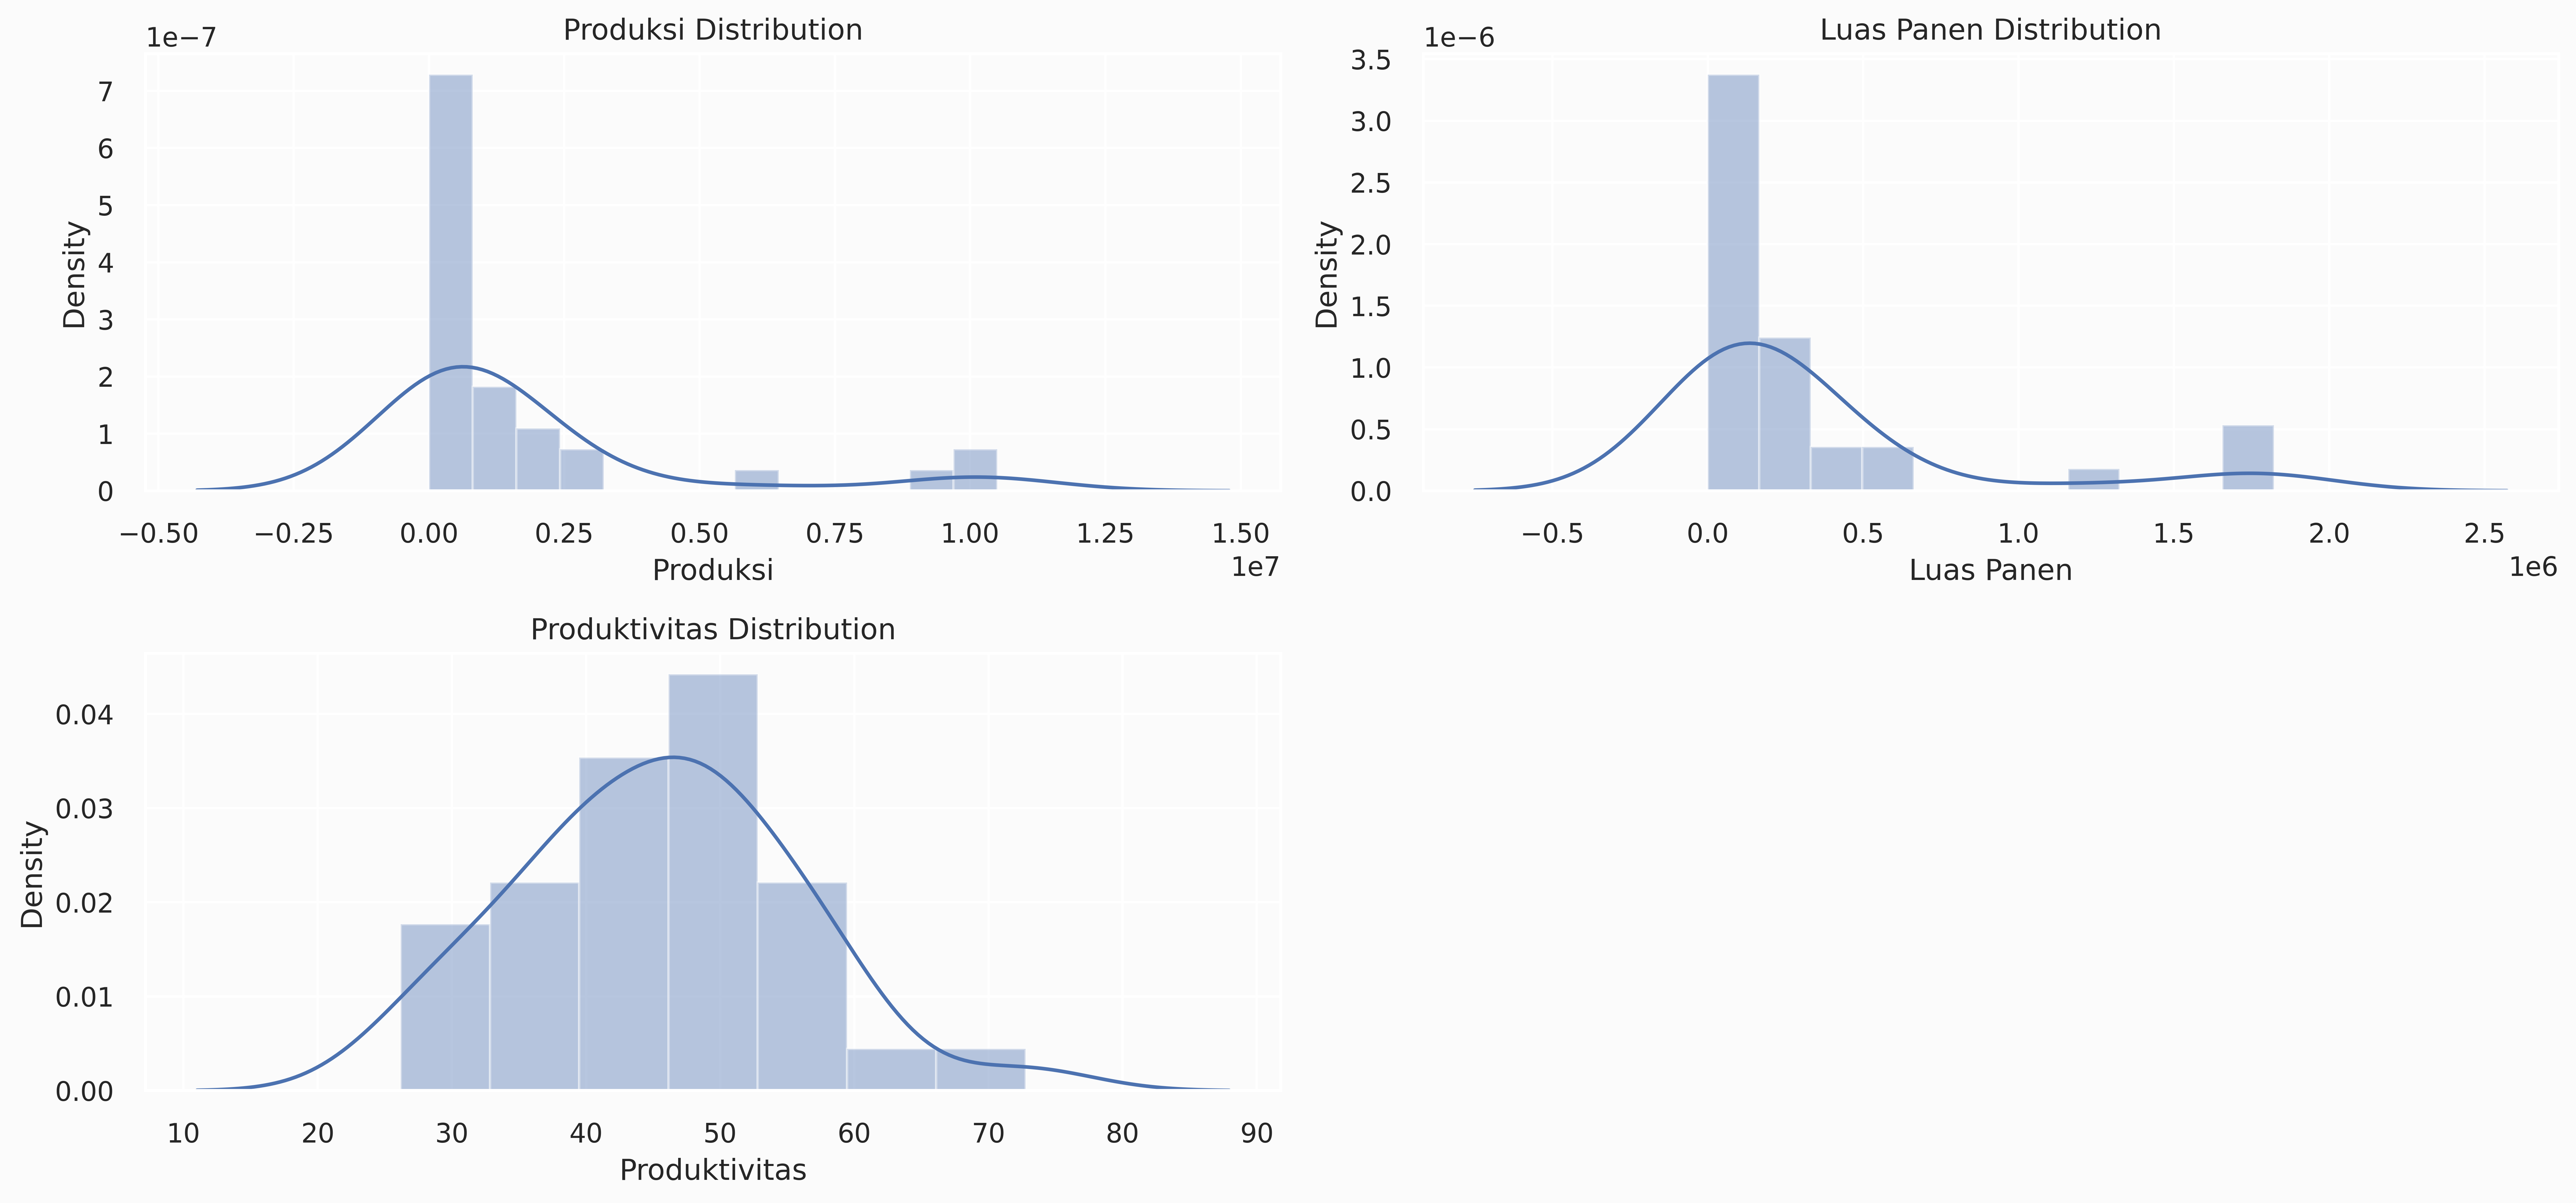

In [ ]:
plt.figure(figsize=(15,10))
for i, j in enumerate(data.describe().columns):
    plt.subplot(3,2, i+1)
    sns.distplot(x=data[j])
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    # plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.tight_layout()
plt.show()

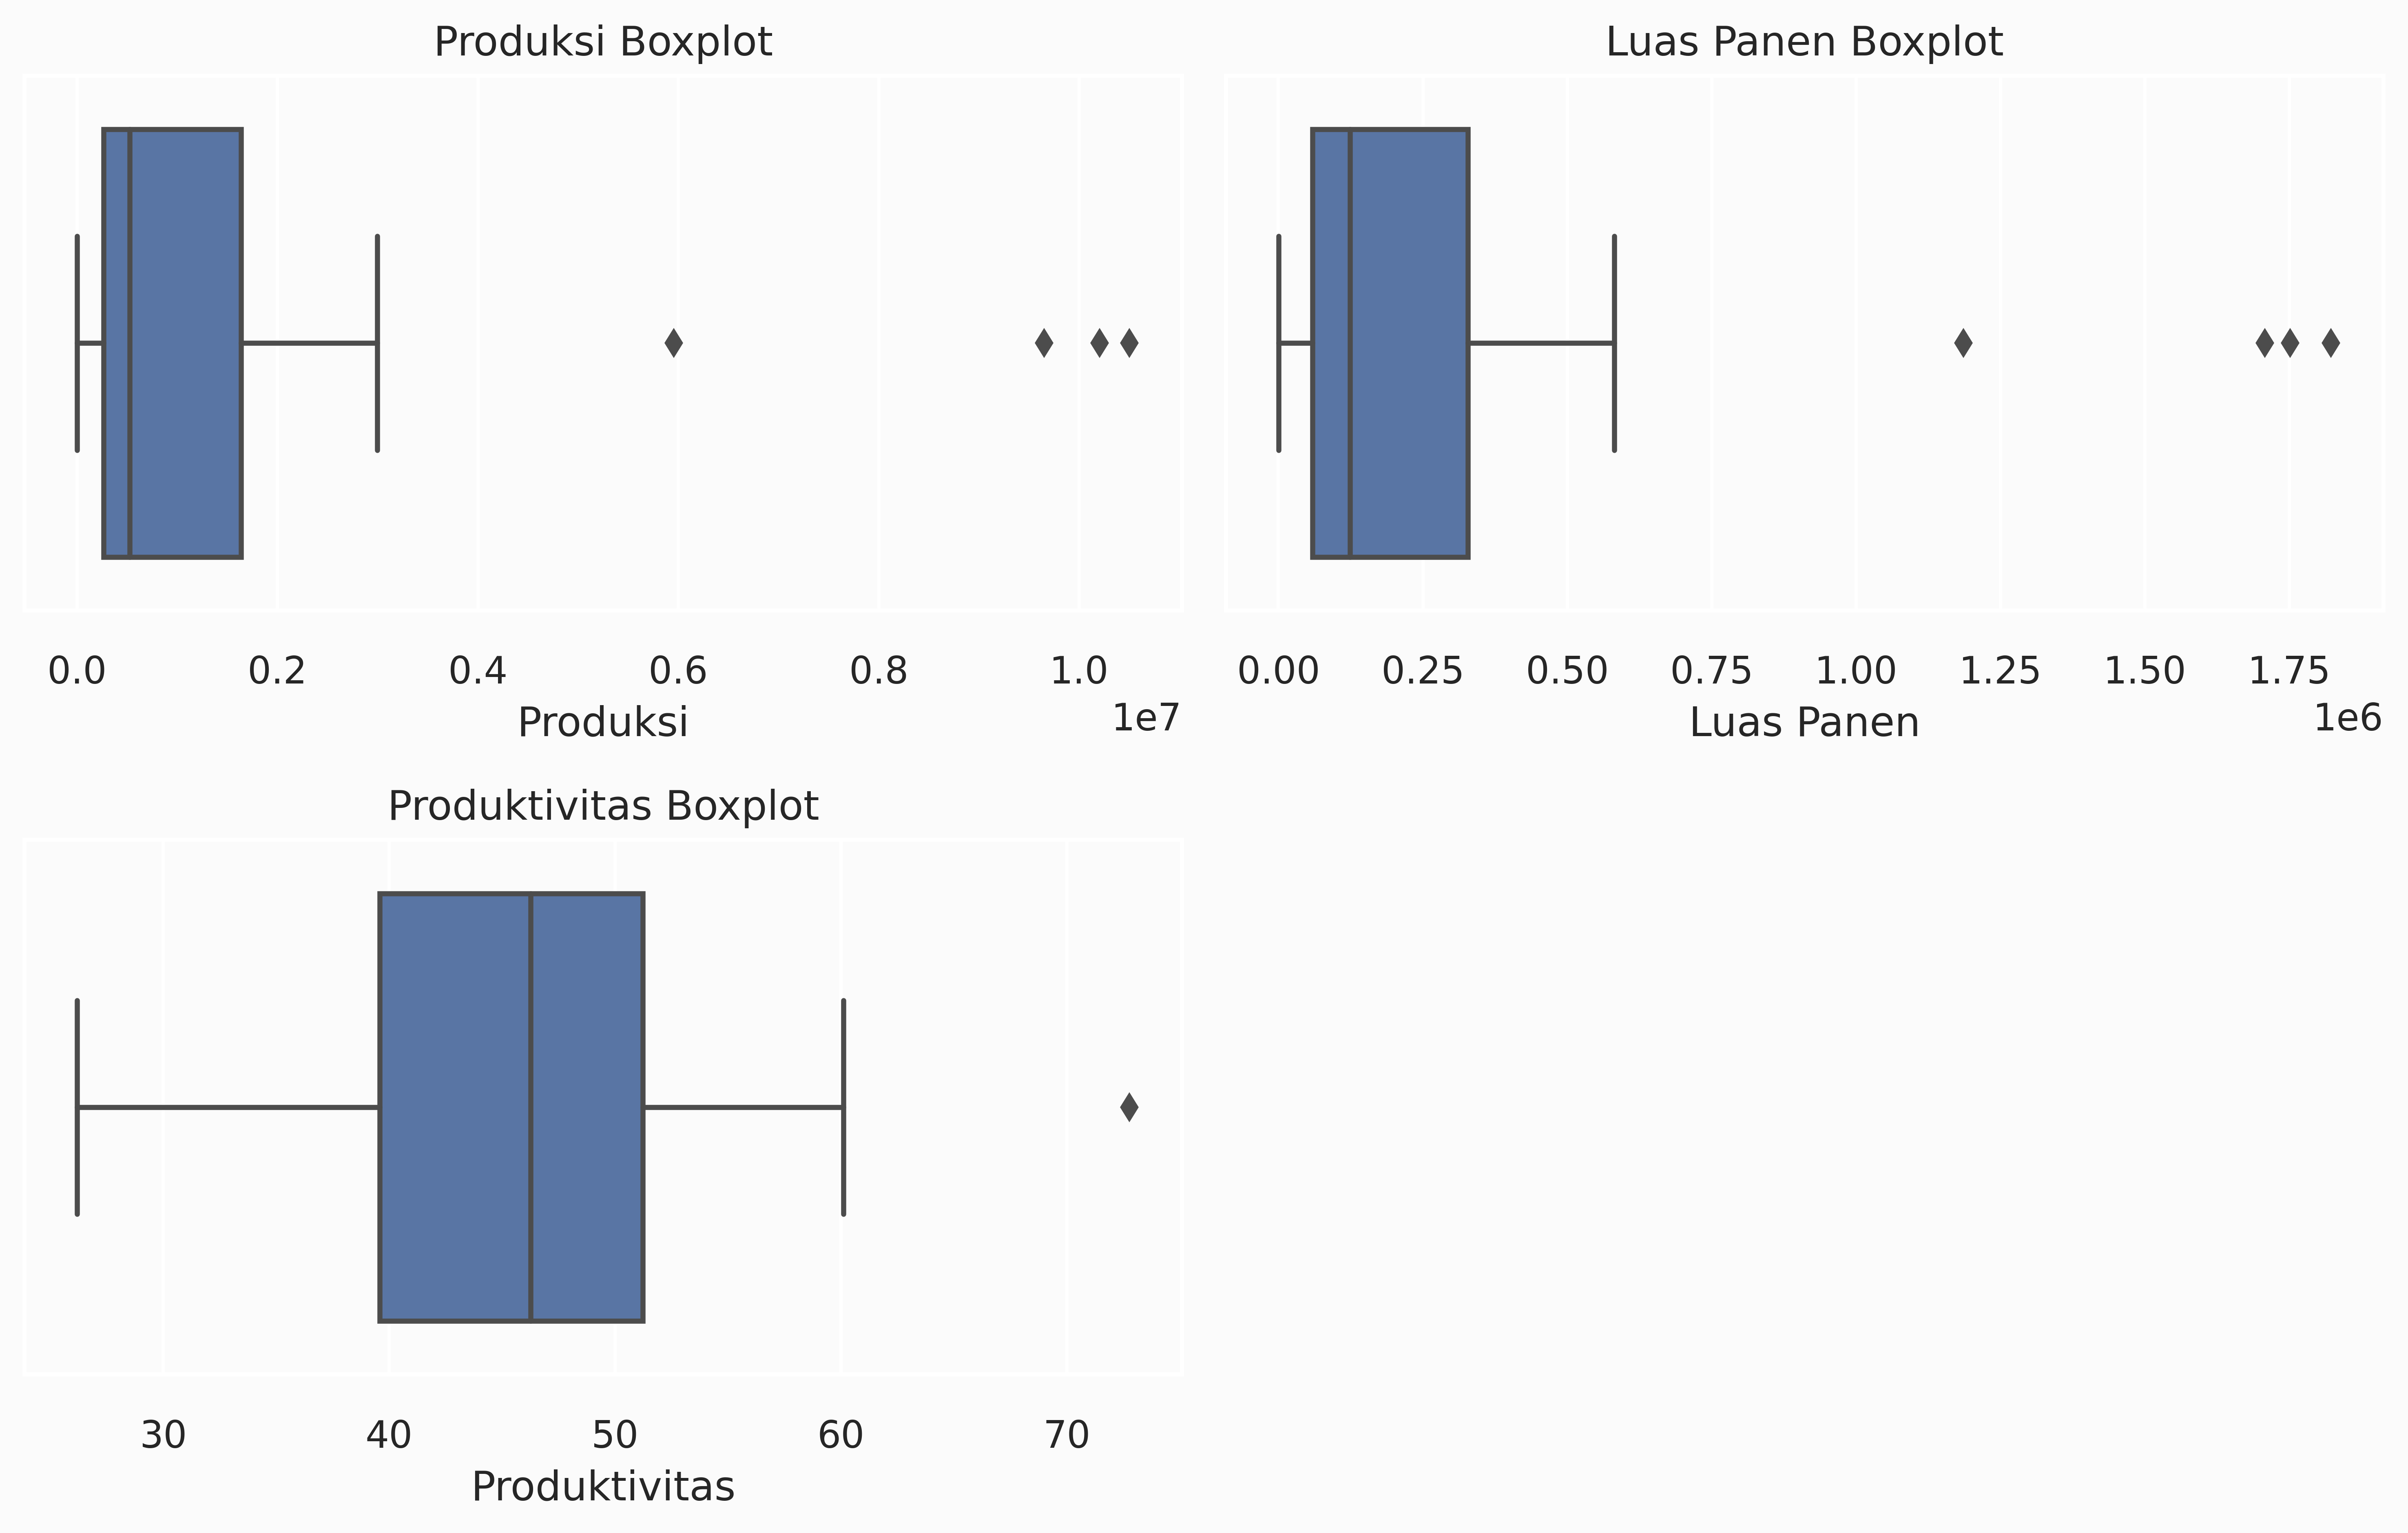

In [ ]:
plt.figure(figsize=(10,9))
for i, j in enumerate(data.describe().columns):
    plt.subplot(3,2, i+1)
    sns.boxplot(x=data[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()

plt.show()

In [ ]:
import pandas as pd

# Membuat dataframe contoh

# Mendefinisikan fungsi untuk mendeteksi outlier dengan metode IQR
def detect_outlier_iqr(data, threshold=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return (data < lower_bound) | (data > upper_bound)

# Mendeteksi outlier untuk setiap variabel
outliers_var1 = detect_outlier_iqr(data['Produksi'])
outliers_var2 = detect_outlier_iqr(data['Luas Panen'])
outliers_var3 = detect_outlier_iqr(data['Produktivitas'])

# Menampilkan hasil deteksi outlier
print("Outliers in Var1:", data[outliers_var1])
print("Outliers in Var2:", data[outliers_var2])
print("Outliers in Var3:", data[outliers_var3])


Outliers in Var1:             Provinsi     Produksi  Luas Panen  Produktivitas
11        Jawa Barat   9647358.75  1707253.81          56.51
12       Jawa Tengah  10499588.23  1821983.17          57.63
14        Jawa Timur  10203213.17  1751191.67          58.26
26  Sulawesi Selatan   5952616.45  1185484.10          50.21
Outliers in Var2:             Provinsi     Produksi  Luas Panen  Produktivitas
11        Jawa Barat   9647358.75  1707253.81          56.51
12       Jawa Tengah  10499588.23  1821983.17          57.63
14        Jawa Timur  10203213.17  1751191.67          58.26
26  Sulawesi Selatan   5952616.45  1185484.10          50.21
Outliers in Var3:        Provinsi  Produksi  Luas Panen  Produktivitas
10  Dki Jakarta   4899.14      673.37          72.76


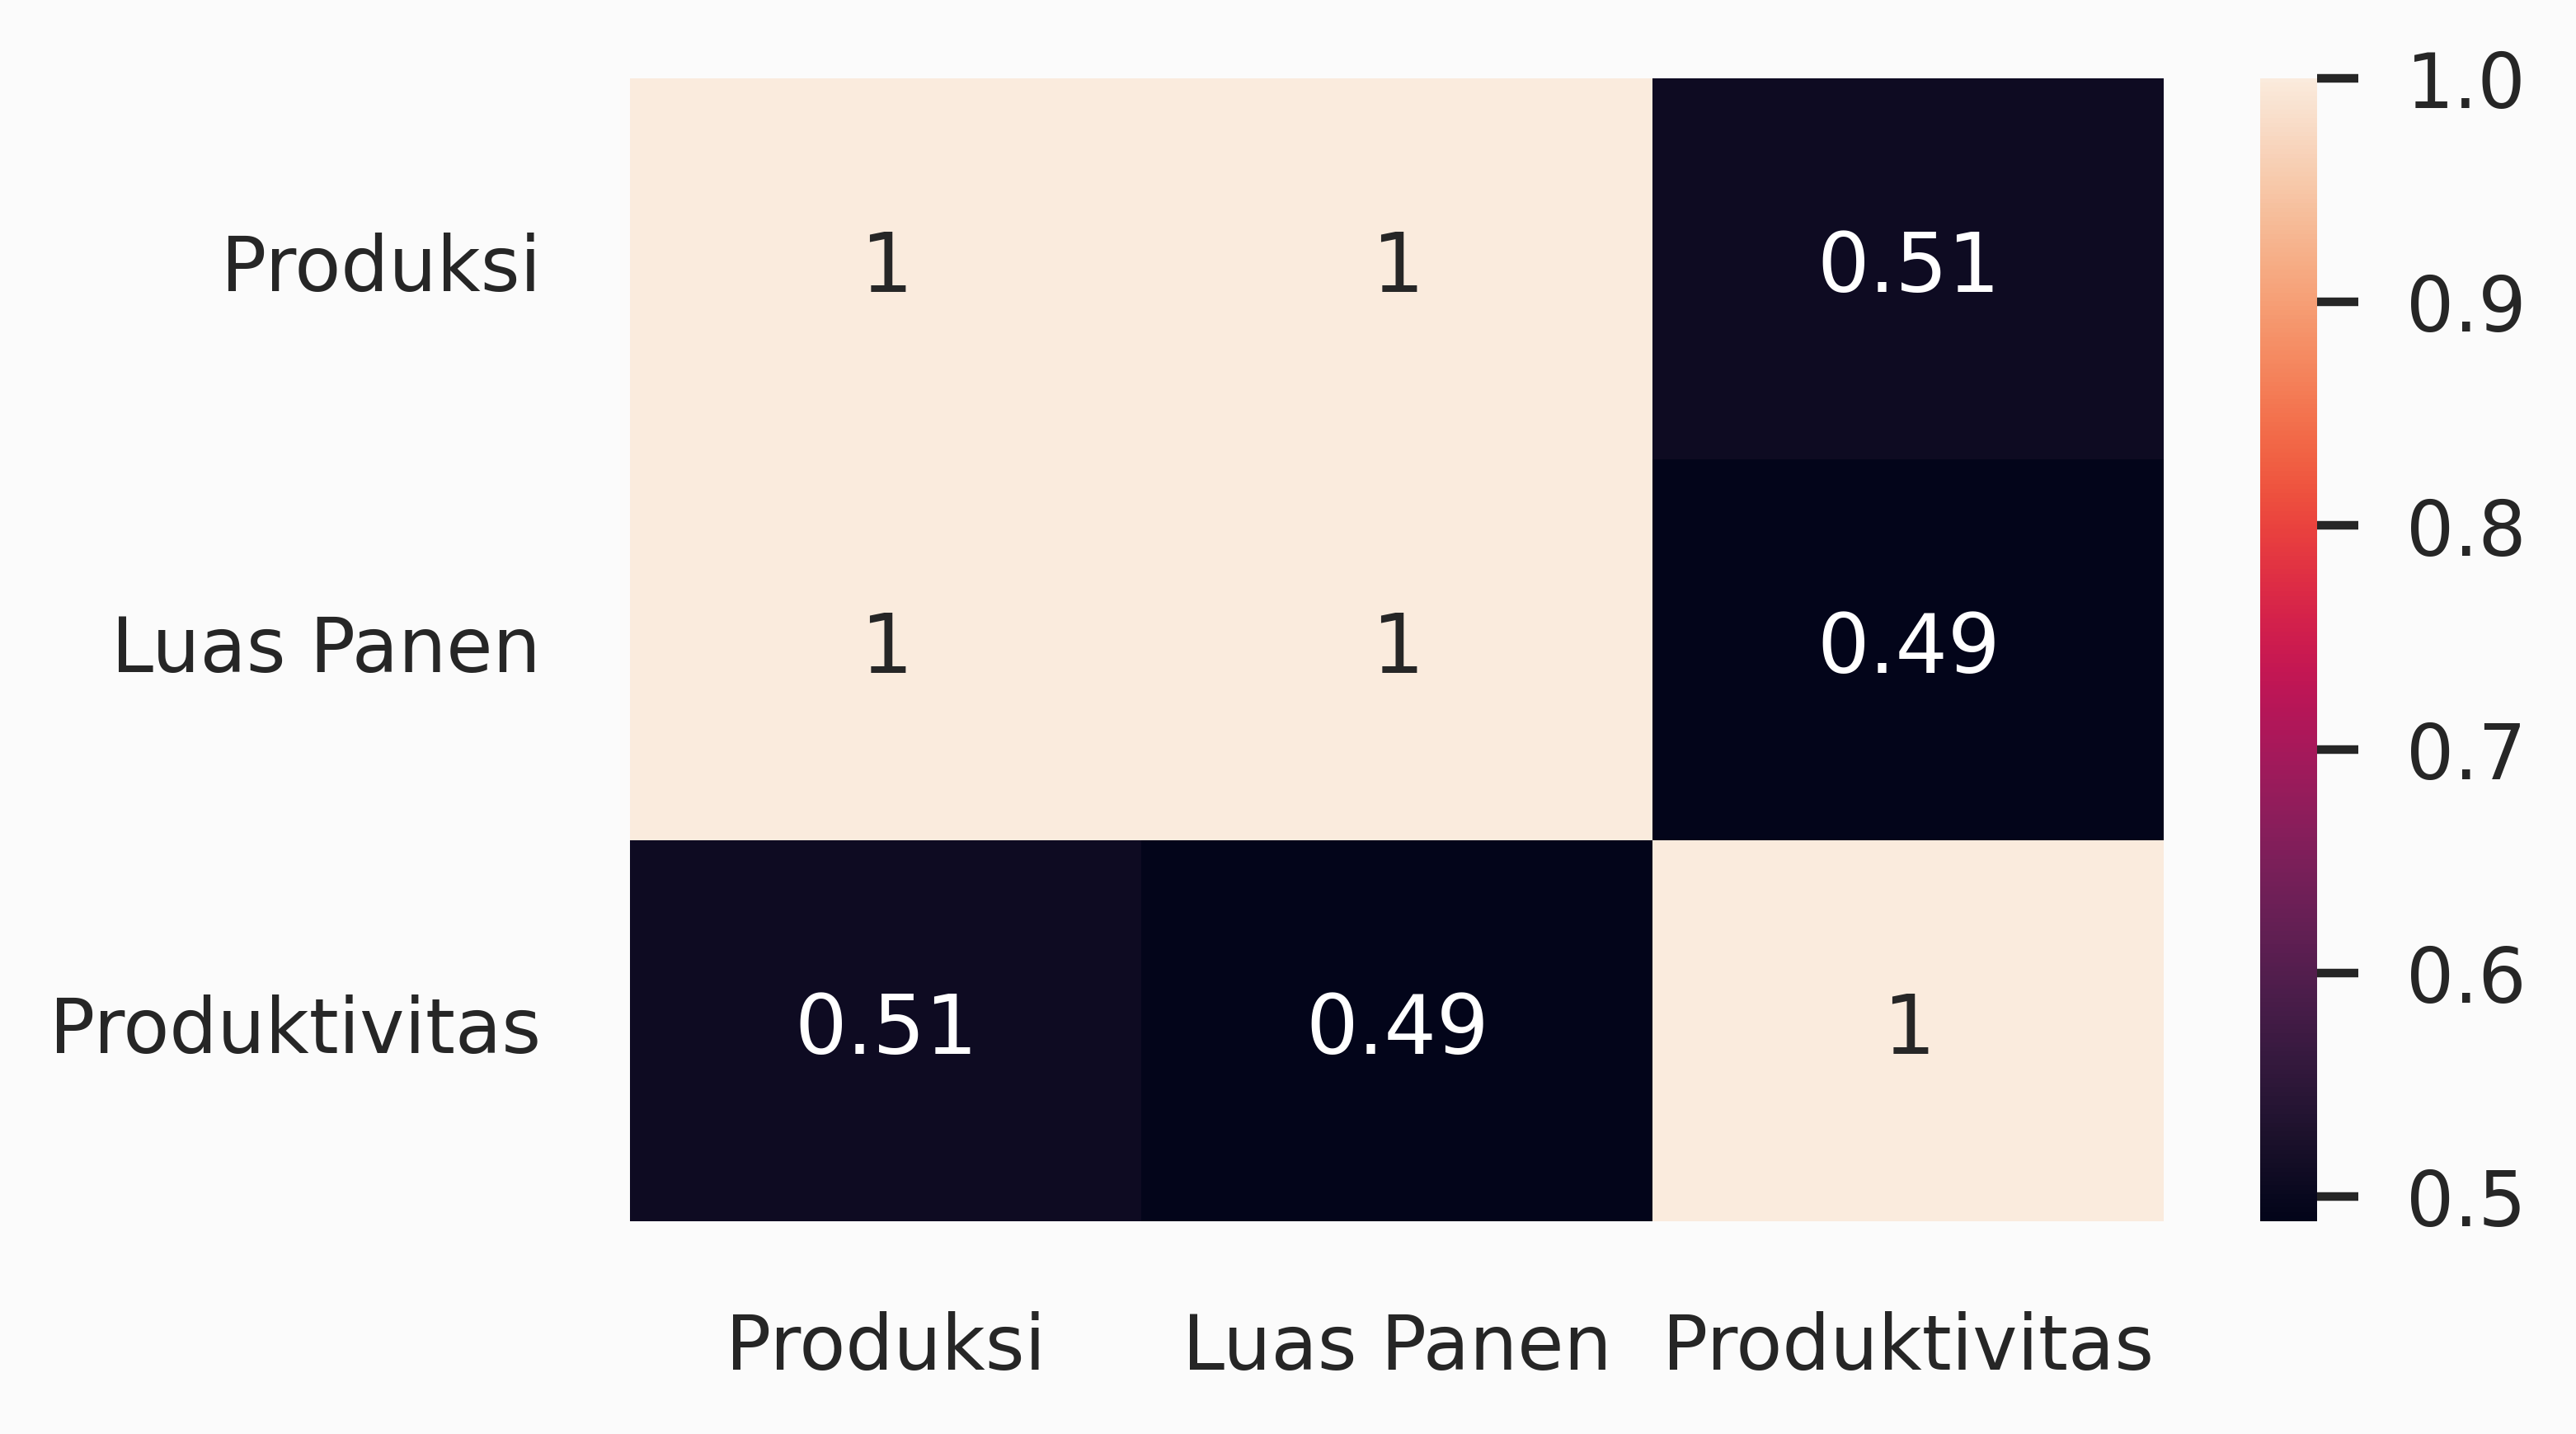

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(data.corr(), annot=True)
plt.show()

# Transformation

In [ ]:
df_cluster = data[['Produksi', 'Luas Panen', 'Produktivitas']]
X = np.log(df_cluster)

In [ ]:
X = np.array(X)

In [ ]:
X

array([[14.43692922, 12.70537952,  4.03406363],
       [14.56138525, 12.91945484,  3.9444902 ],
       [14.20962919, 12.65412082,  3.85798912],
       [12.49266236, 11.17672631,  3.61845699],
       [12.85590969, 11.36445655,  3.79413996],
       [14.91218492, 13.27349455,  3.94119338],
       [12.57352611, 11.09575957,  3.78031851],
       [14.7272477 , 13.14596453,  3.88382927],
       [10.73039369,  9.75461567,  3.26537766],
       [ 7.00033446,  5.92924334,  3.37382618],
       [ 8.49681496,  6.51229496,  4.28716635],
       [16.08219473, 14.35039668,  4.03441761],
       [16.1668466 , 14.41543612,  4.05404327],
       [13.15179691, 11.45058666,  4.00387266],
       [16.13821325, 14.37580707,  4.06491575],
       [14.33892657, 12.75082439,  3.89059506],
       [13.41064886, 11.6170906 ,  4.09617622],
       [14.19417903, 12.57502103,  3.9217753 ],
       [13.7100788 , 12.29331817,  3.71940866],
       [13.59201096, 12.56541015,  3.32934328],
       [13.15147363, 11.90206937,  3.551

## Hopkins Test


* H0 : Dataset tidak berdistribusi normal
* H1 : Dataset berdistribusi normal

Kriteria:
* Jika value diantara {0.7,...,0.99} maka H0 diterima



In [ ]:
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0

    return H

hopkins_value = hopkins(X)
hopkins_result = 'Result: '+clr.start+'{:.4f}'.format(hopkins_value)+clr.end
print(clr.start+'.: Hopkins Test :.'+clr.end)
print(clr.color+'*' * 19+clr.end)
print(hopkins_result)
if  0.7 < hopkins_value < 0.99:
    print('>> From the result above,'+clr.color+' it has a high tendency to cluster (contains meaningful clusters)'+clr.end)
    print('\n'+clr.color+'*' * 31+clr.end)
    print(clr.start+'.:. Conclusions: Accept H0 .:.'+clr.end)
    print(clr.color+'*' * 31+clr.end)
else:
    print('>> From the result above,'+clr.color+' it has no meaningful clusters'+clr.end)
    print('\n'+clr.color+'*' * 31+clr.end)
    print(clr.start+'.:. Conclusions: Reject H0 .:.'+clr.end)
    print(clr.color+'*' * 31+clr.end)

.: Hopkins Test :.
*******************
Result: 0.7641
>> From the result above, it has a high tendency to cluster (contains meaningful clusters)

*******************************
.:. Conclusions: Accept H0 .:.
*******************************


# PCA

[link text](https://rpubs.com/ichlasulamal12/cluster_wholesale)

In [ ]:
#X = np.asarray(X)
pca = PCA()
pca.fit(X)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([7.87786206e-01, 2.11777847e-01, 4.35947146e-04])

Text(0, 0.5, 'Cumulative Explained Variance')

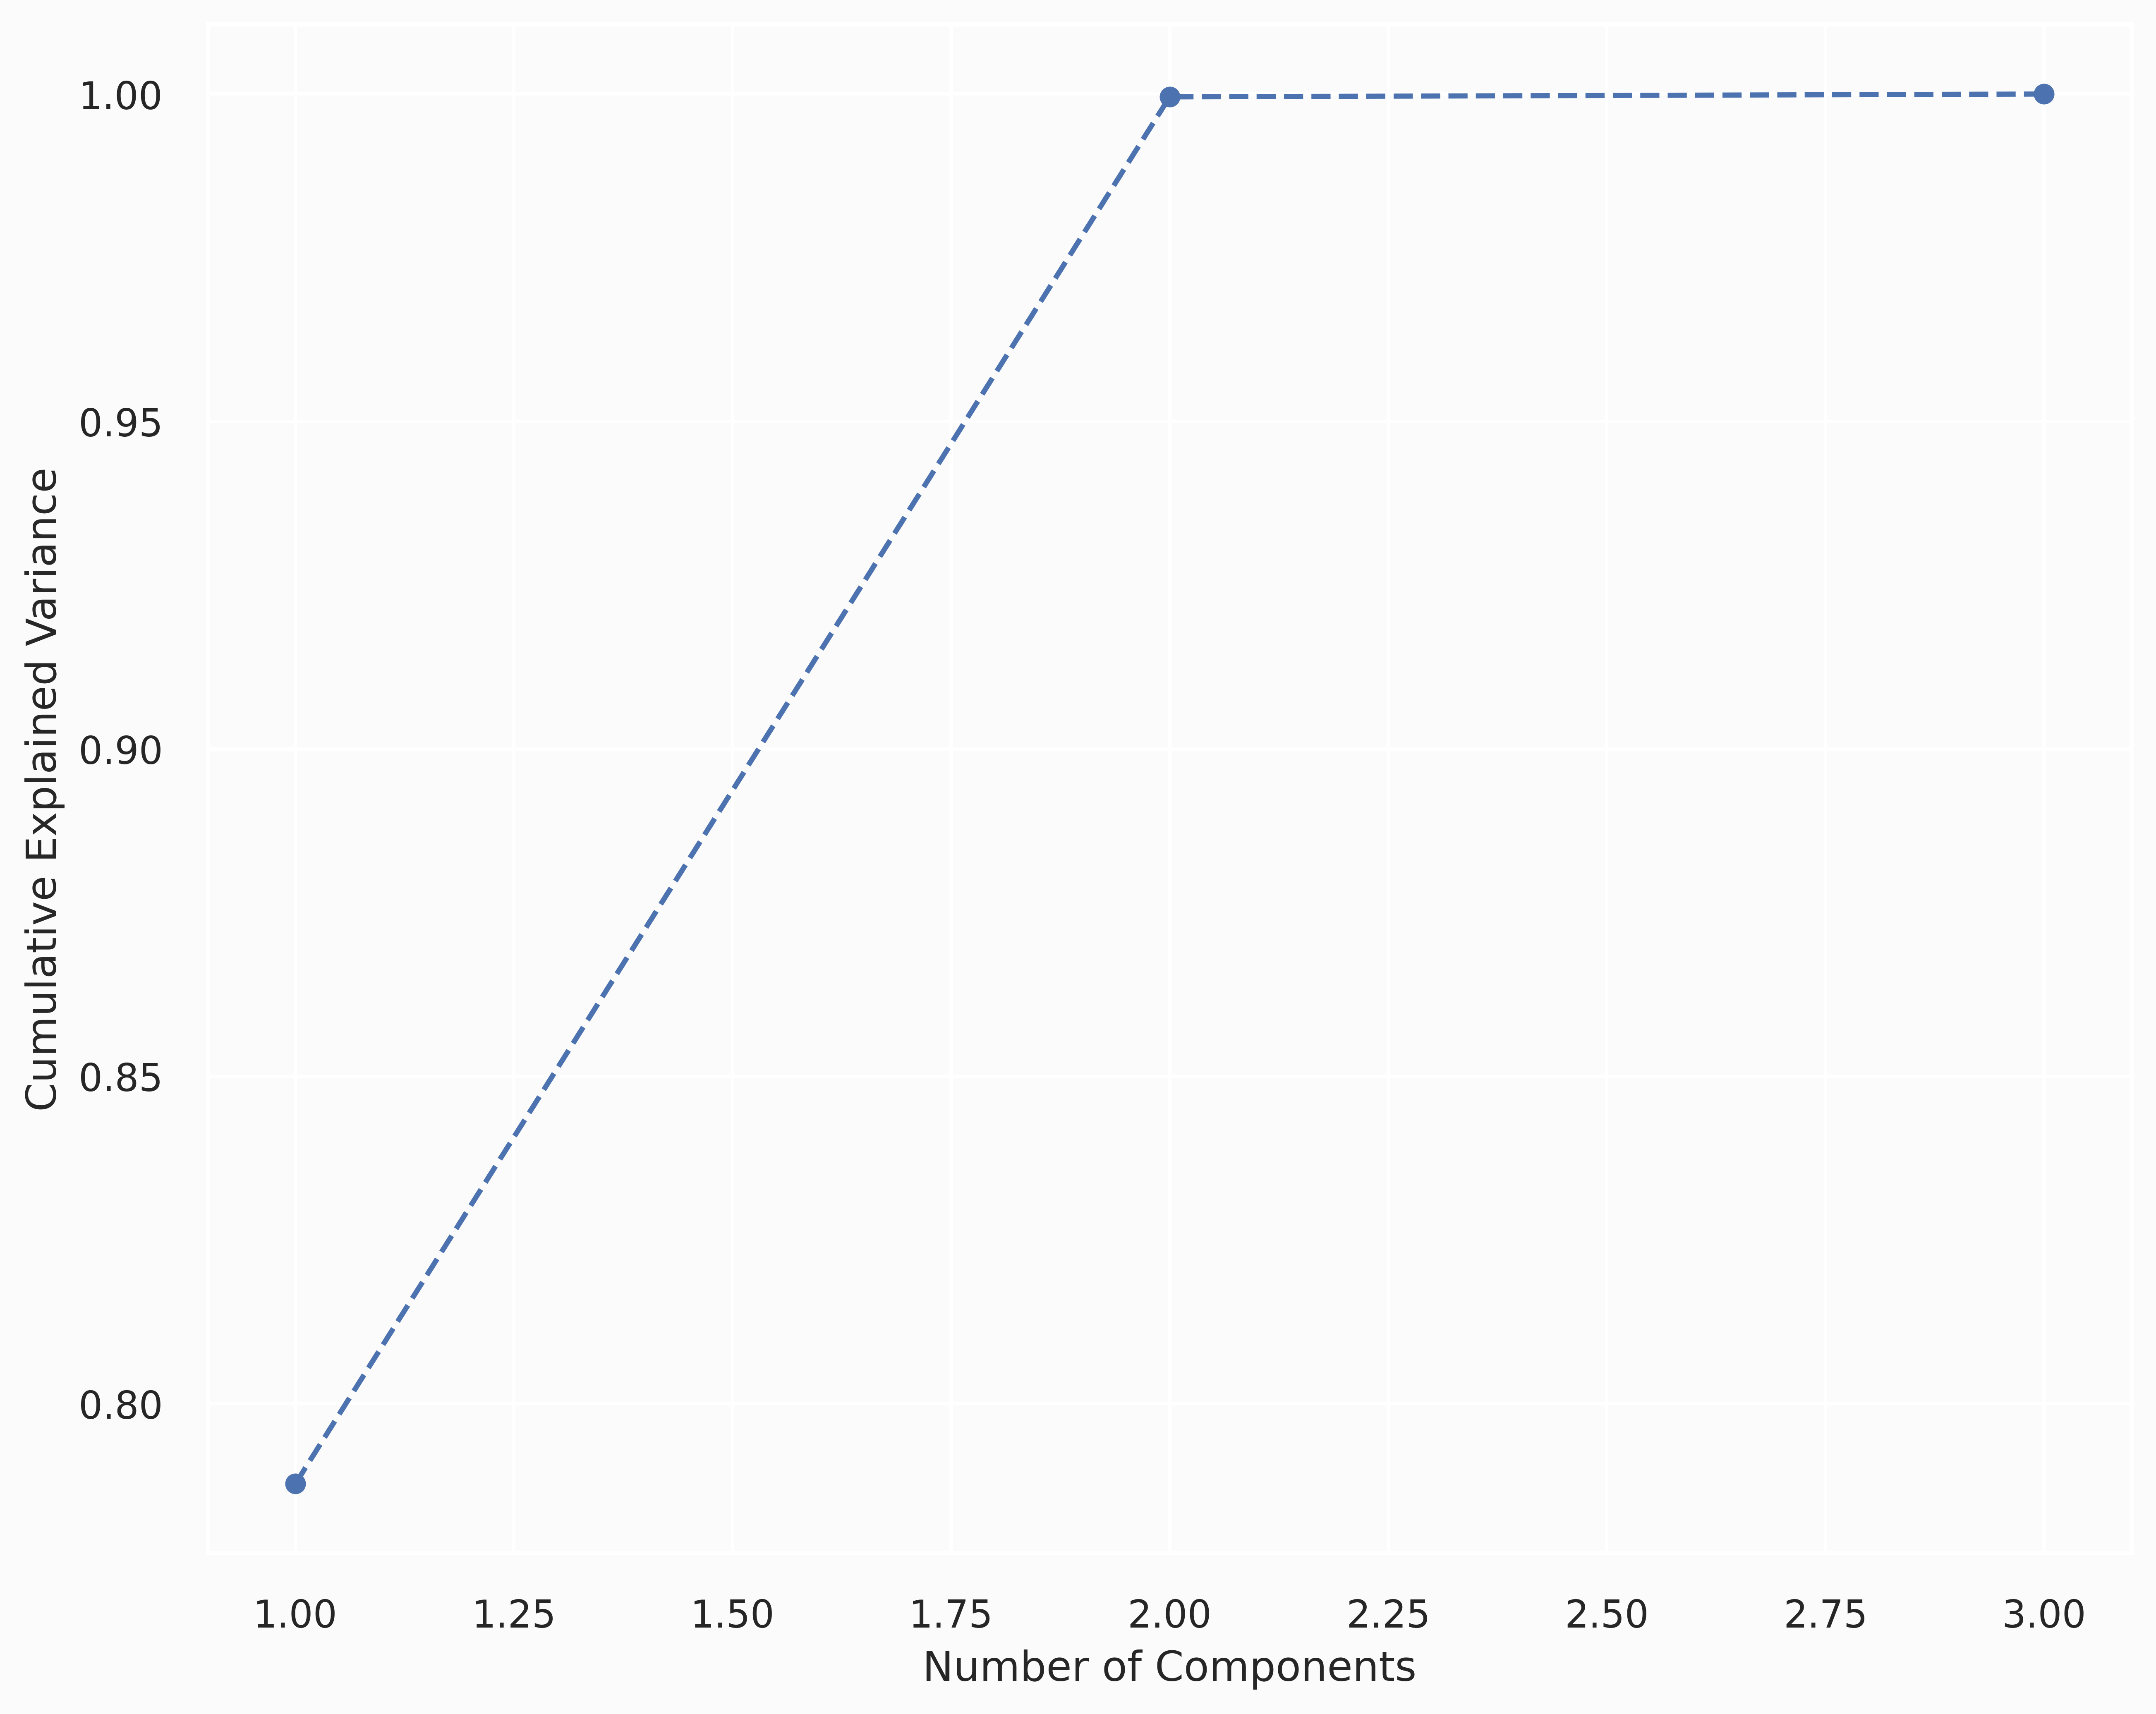

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1,4), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
pca = PCA(n_components=2, random_state=24)
X = pca.fit_transform(X)

# Nilai K
[referensi](https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad)

[link text](https://365datascience.com/tutorials/python-tutorials/pca-k-means/)

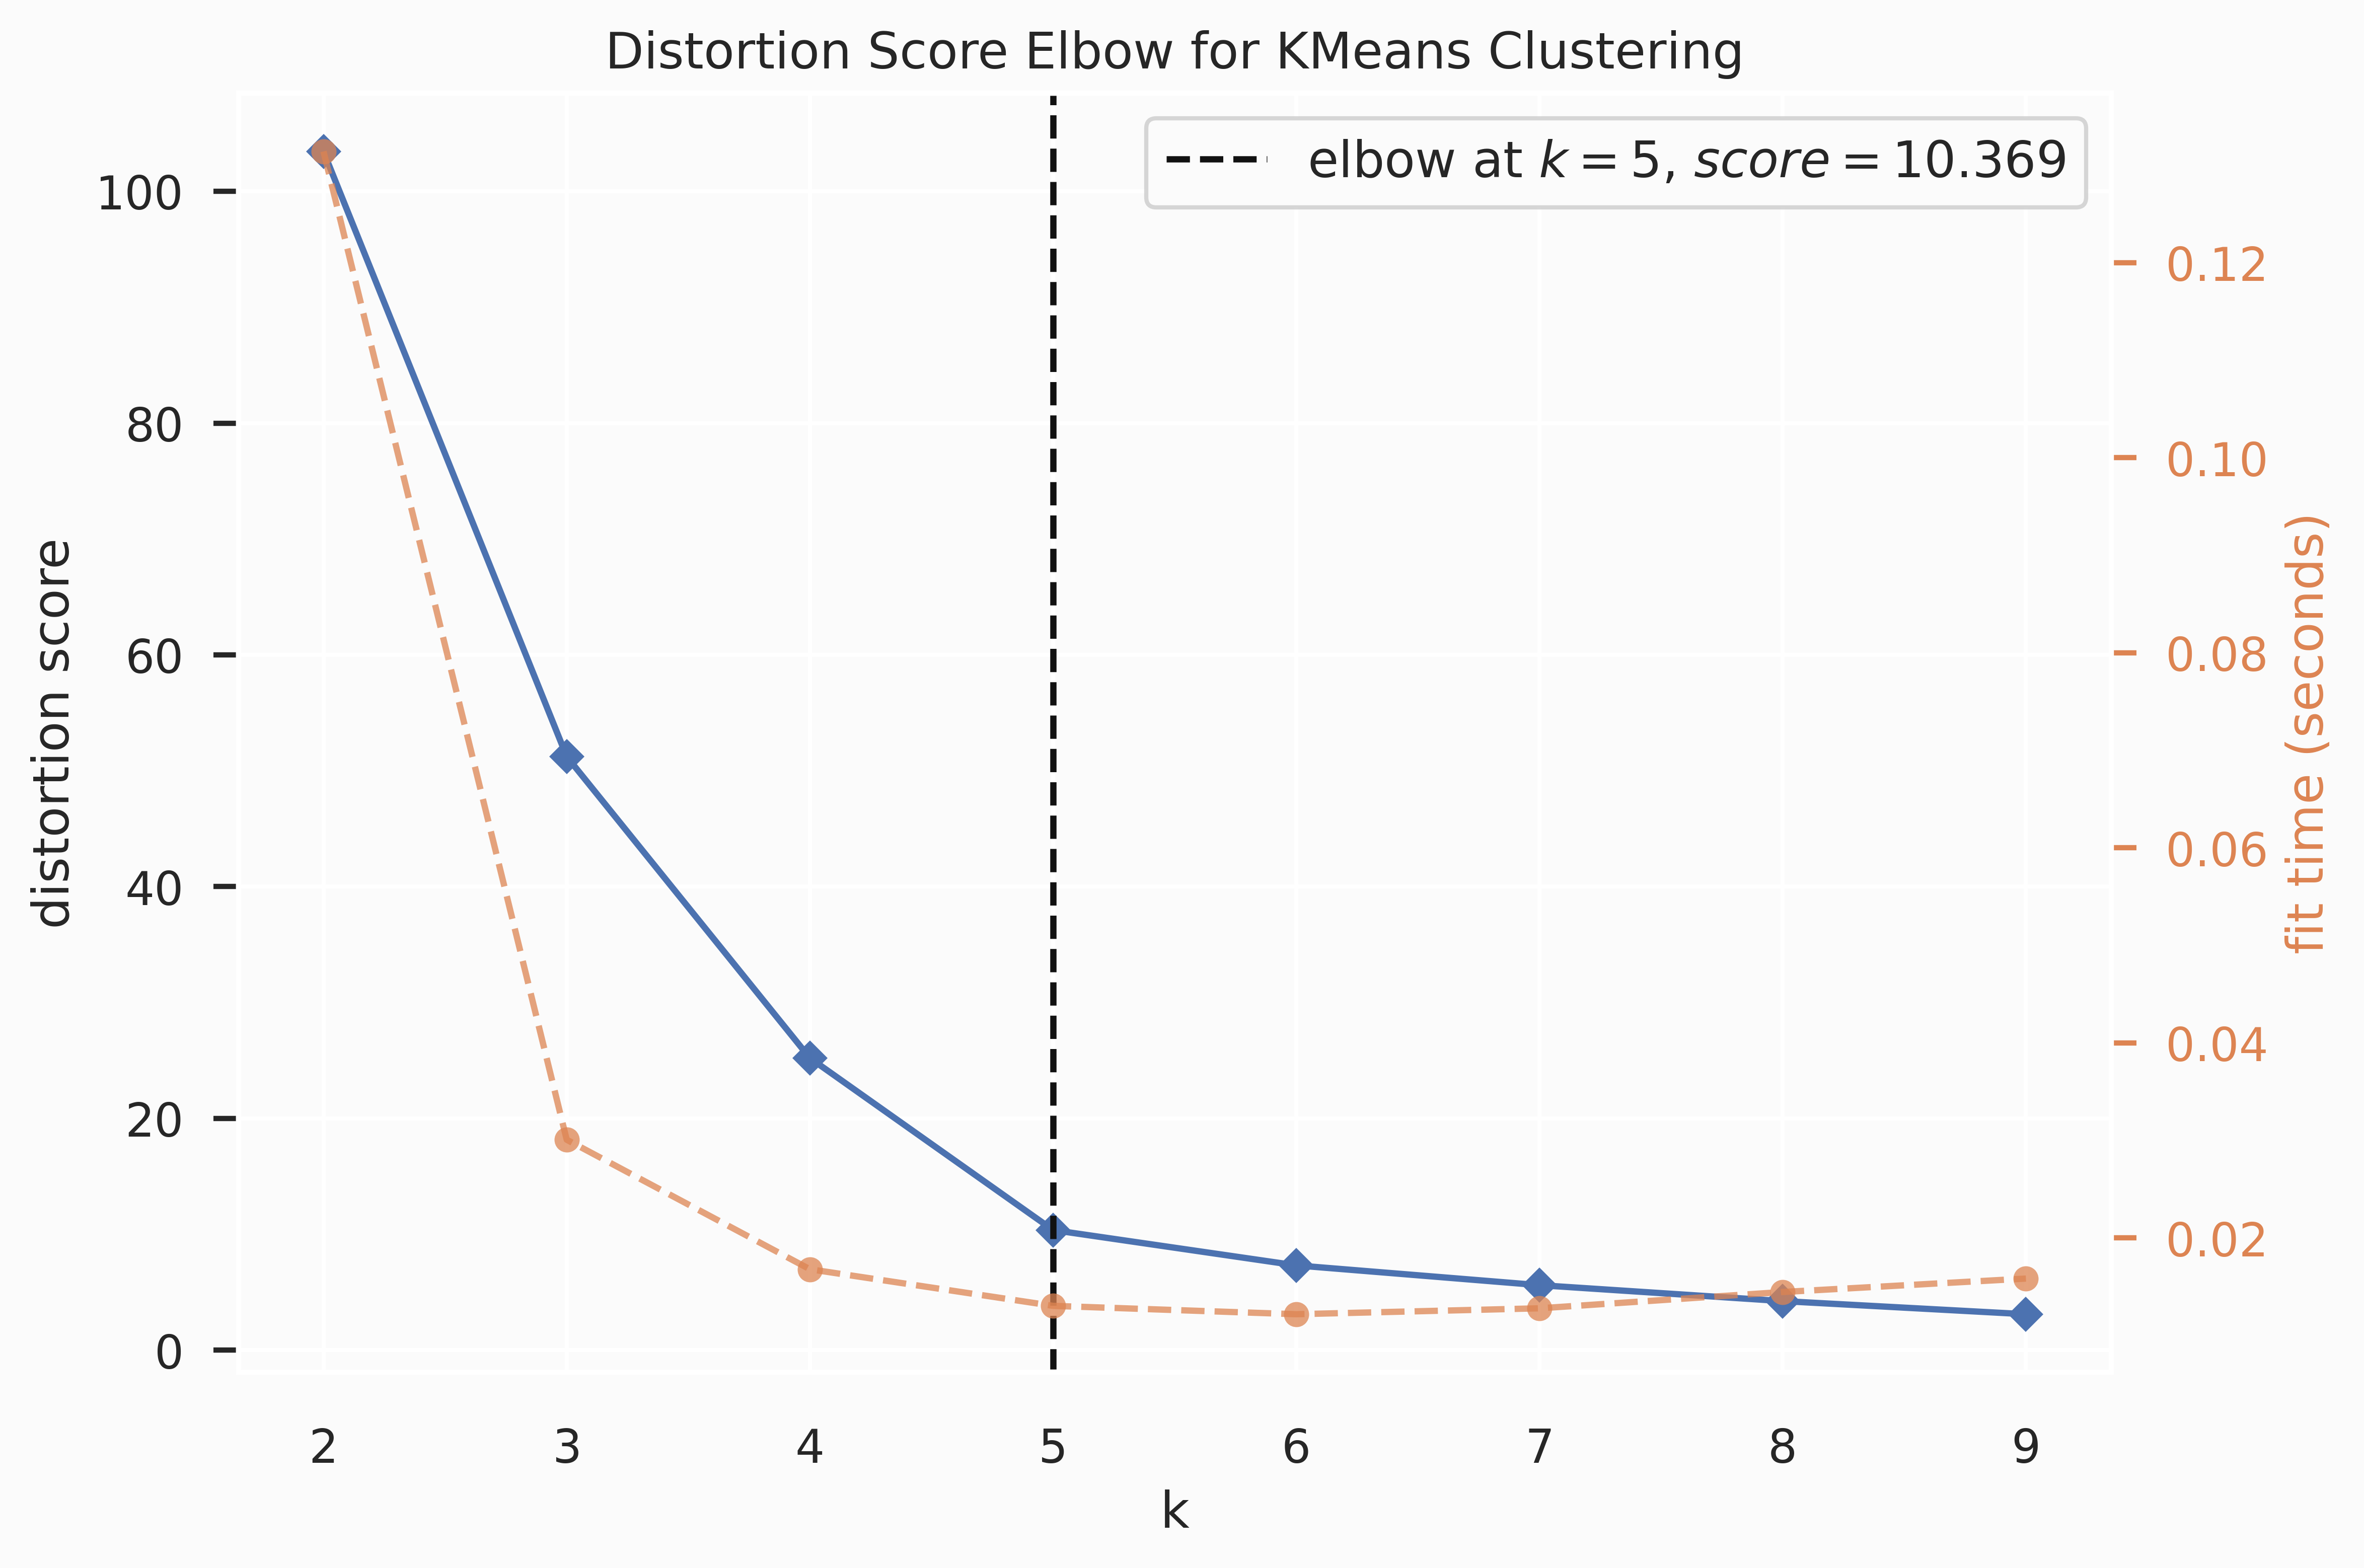

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
elbow_score = KElbowVisualizer(KMeans(random_state=32, max_iter=500), k=(2, 10))
elbow_score.fit(X)
elbow_score.show()

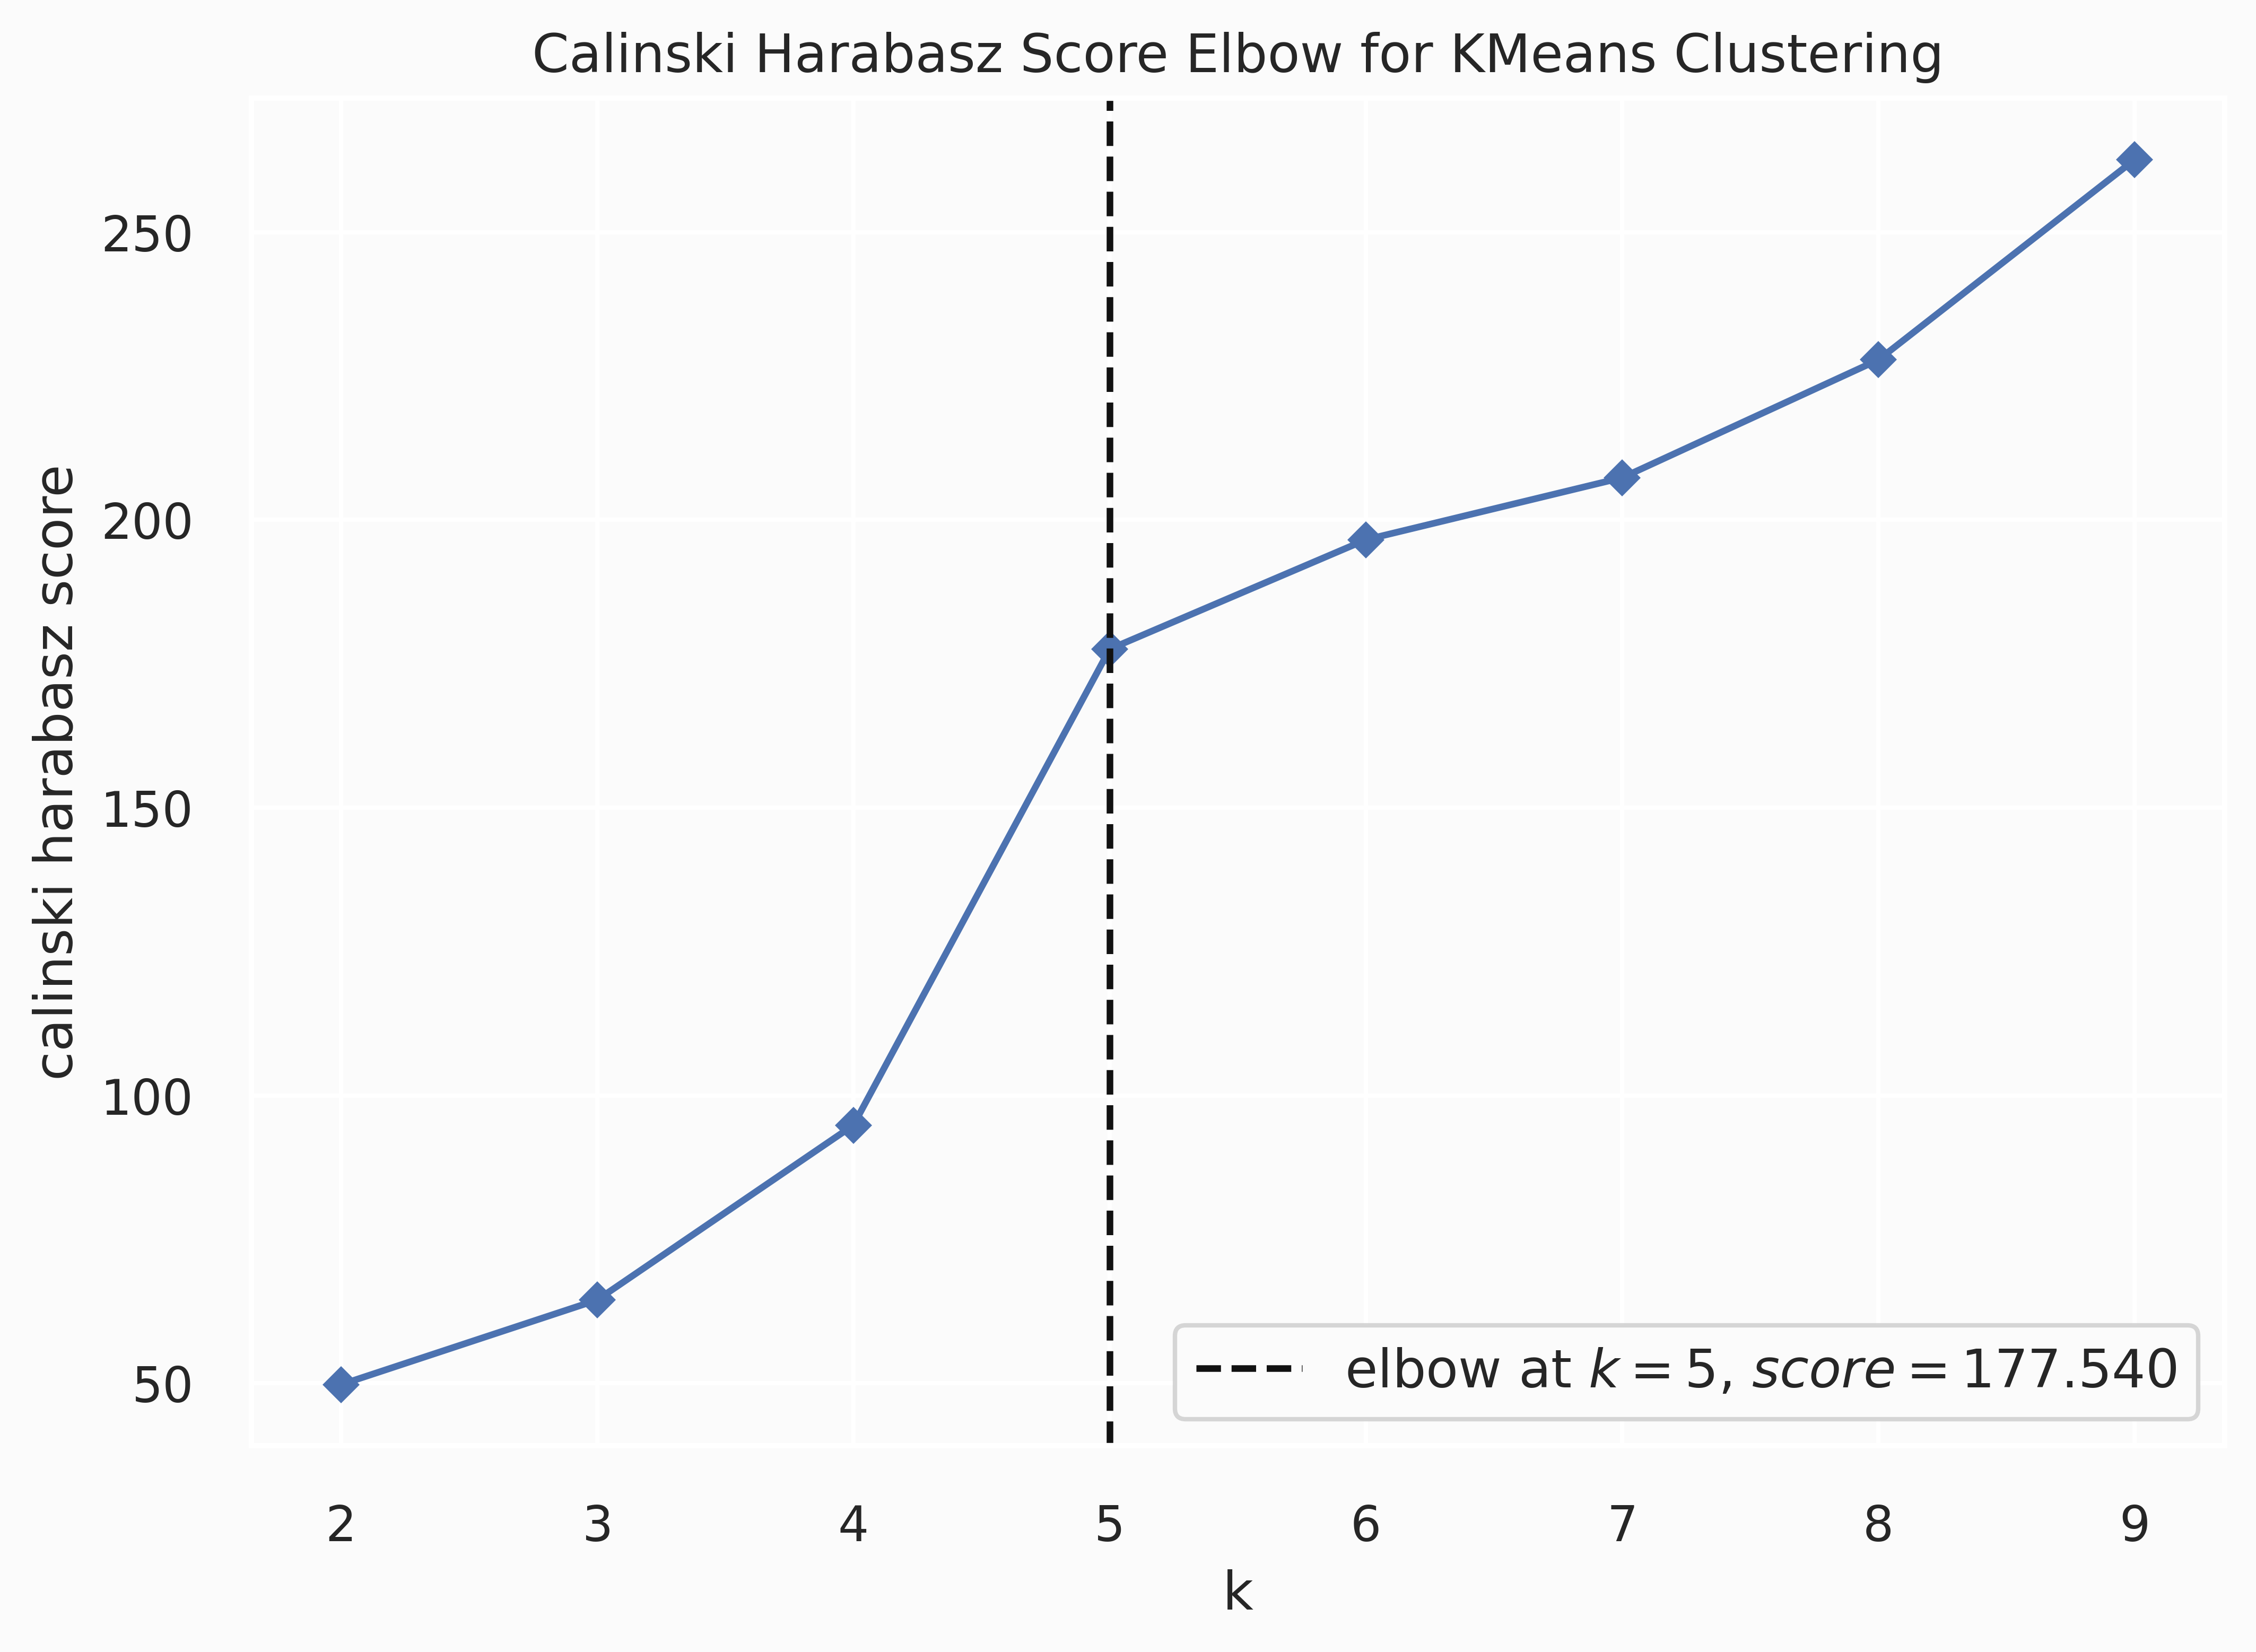

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
elbow_score_ch = KElbowVisualizer(KMeans(random_state=32, max_iter=500), k=(2, 10), metric='calinski_harabasz', timings=False)
elbow_score_ch.fit(X)
elbow_score_ch.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=32, max_iter=500)
y_kmeans = kmeans.fit_predict(X)

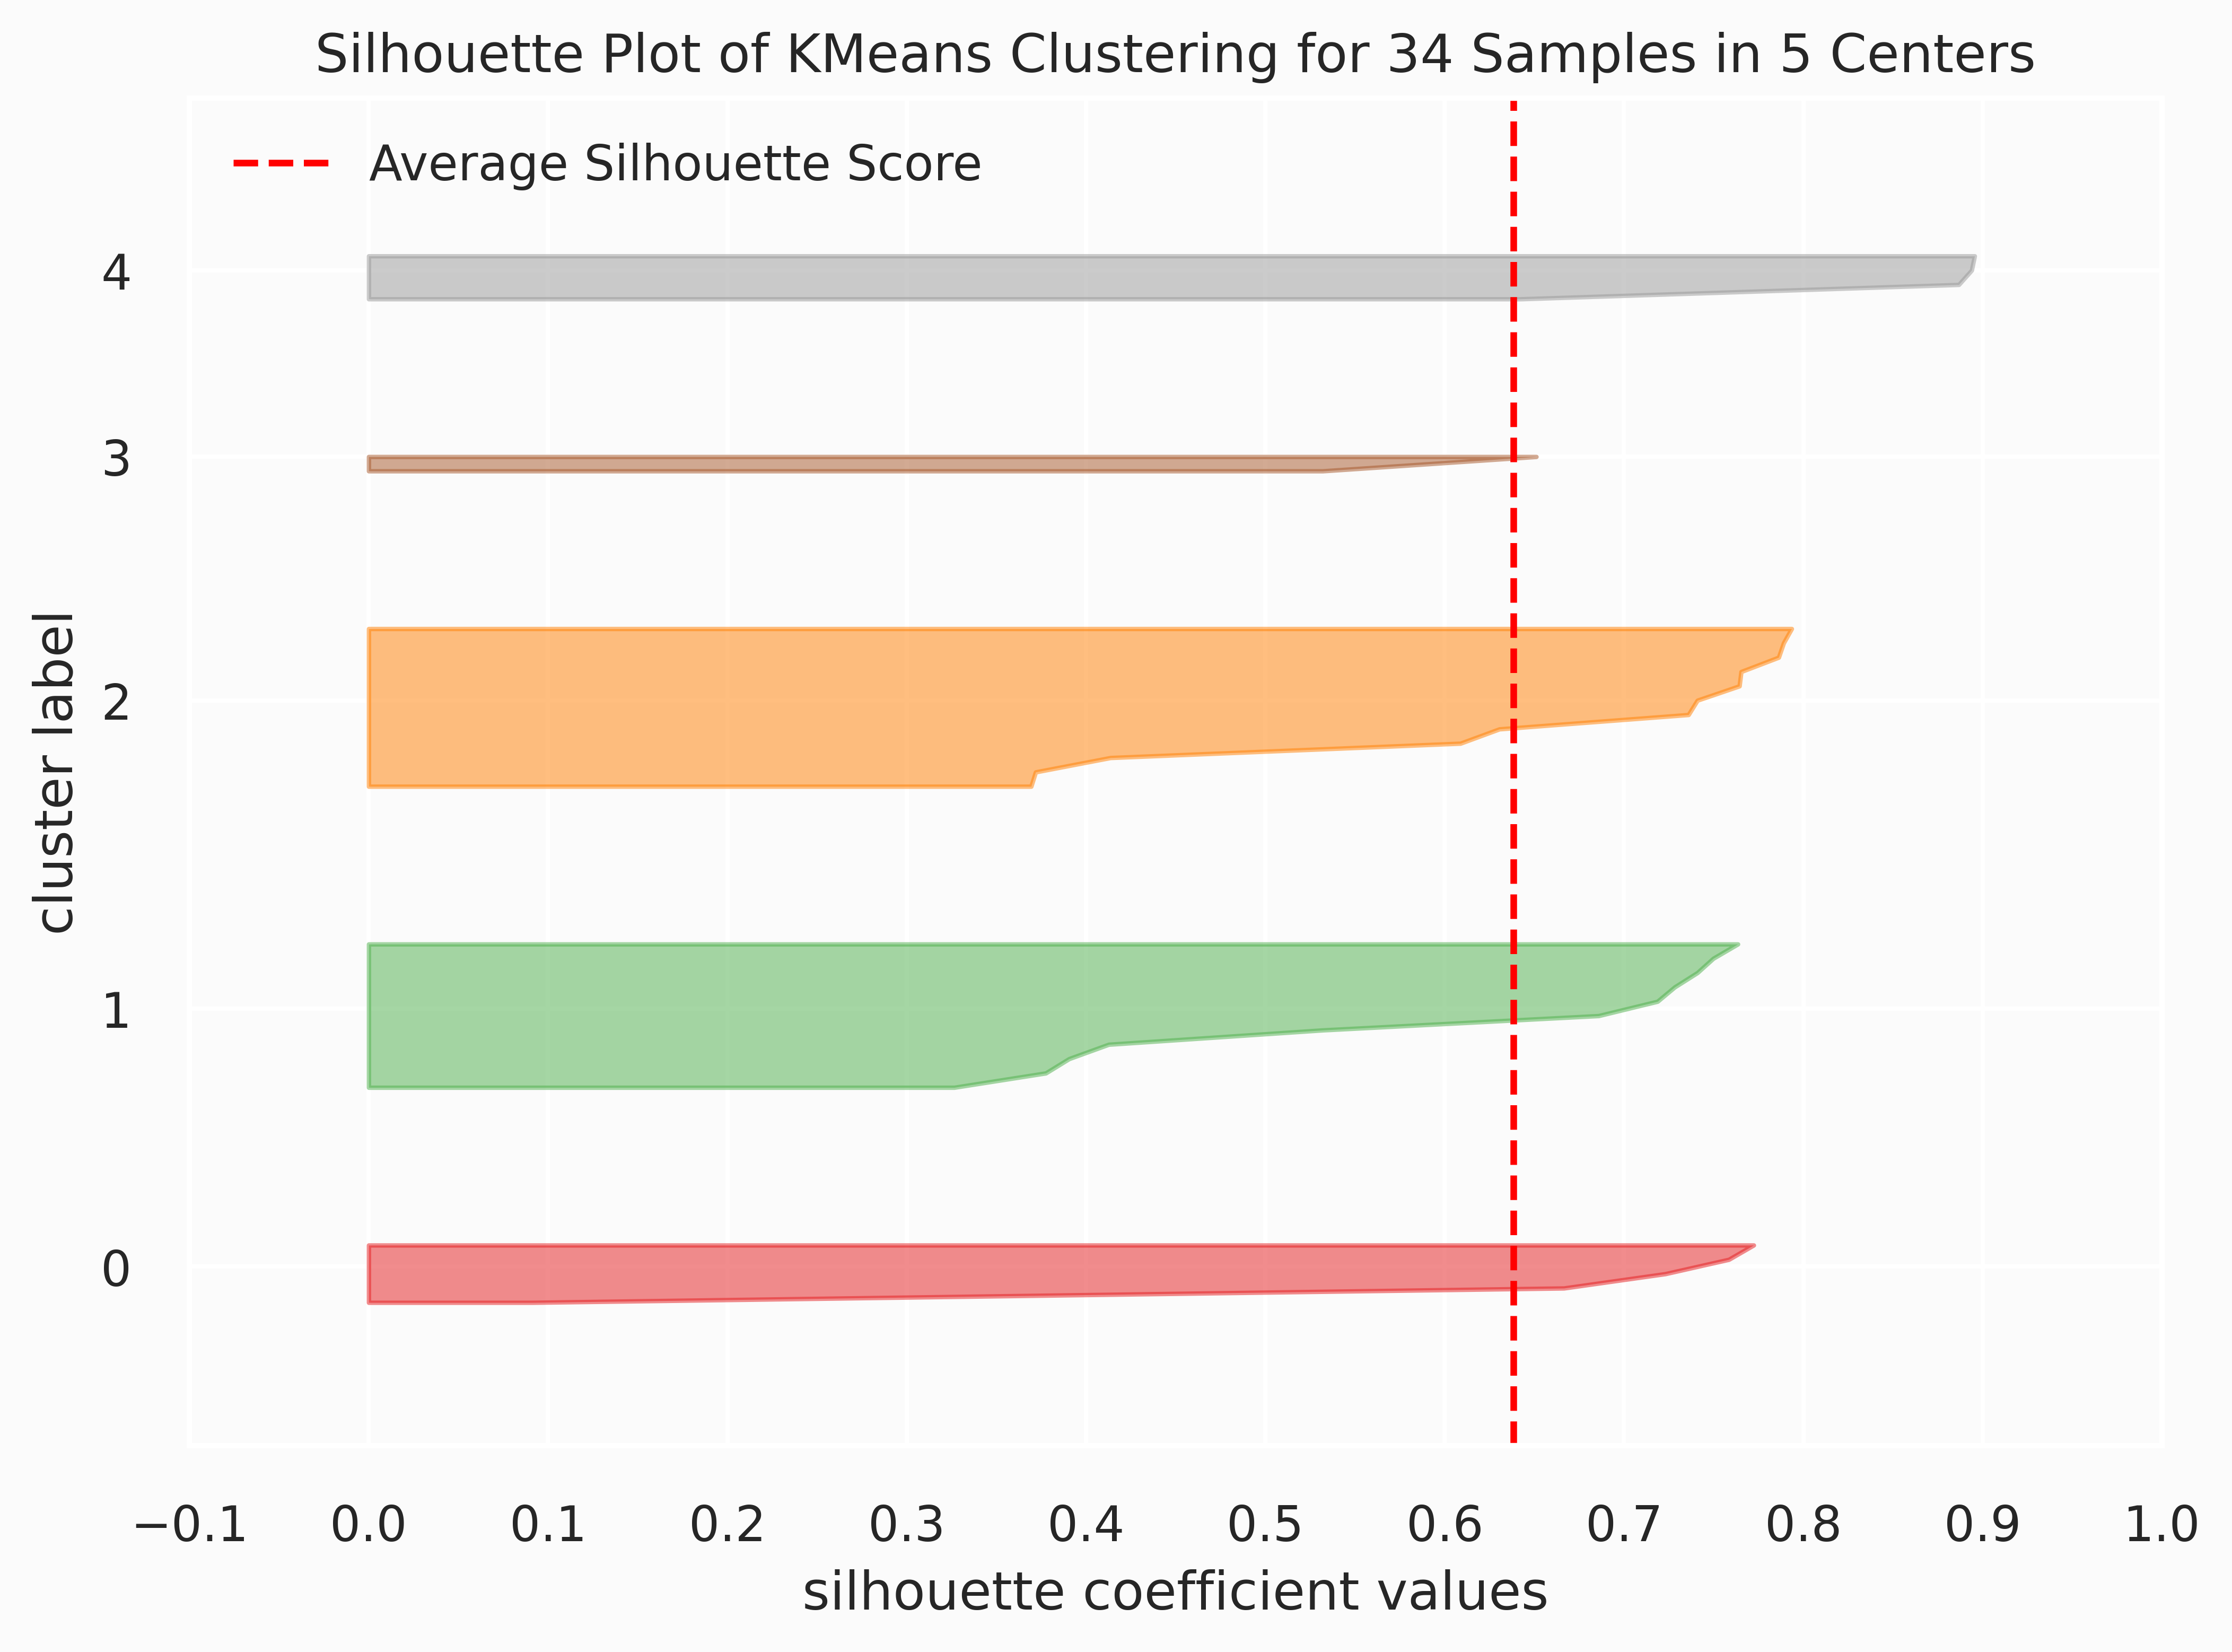

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 34 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
s_viz = SilhouetteVisualizer(kmeans)
s_viz.fit(X)
s_viz.show()

In [ ]:
y_kmeans

array([1, 1, 1, 2, 2, 1, 2, 1, 0, 3, 3, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2], dtype=int32)

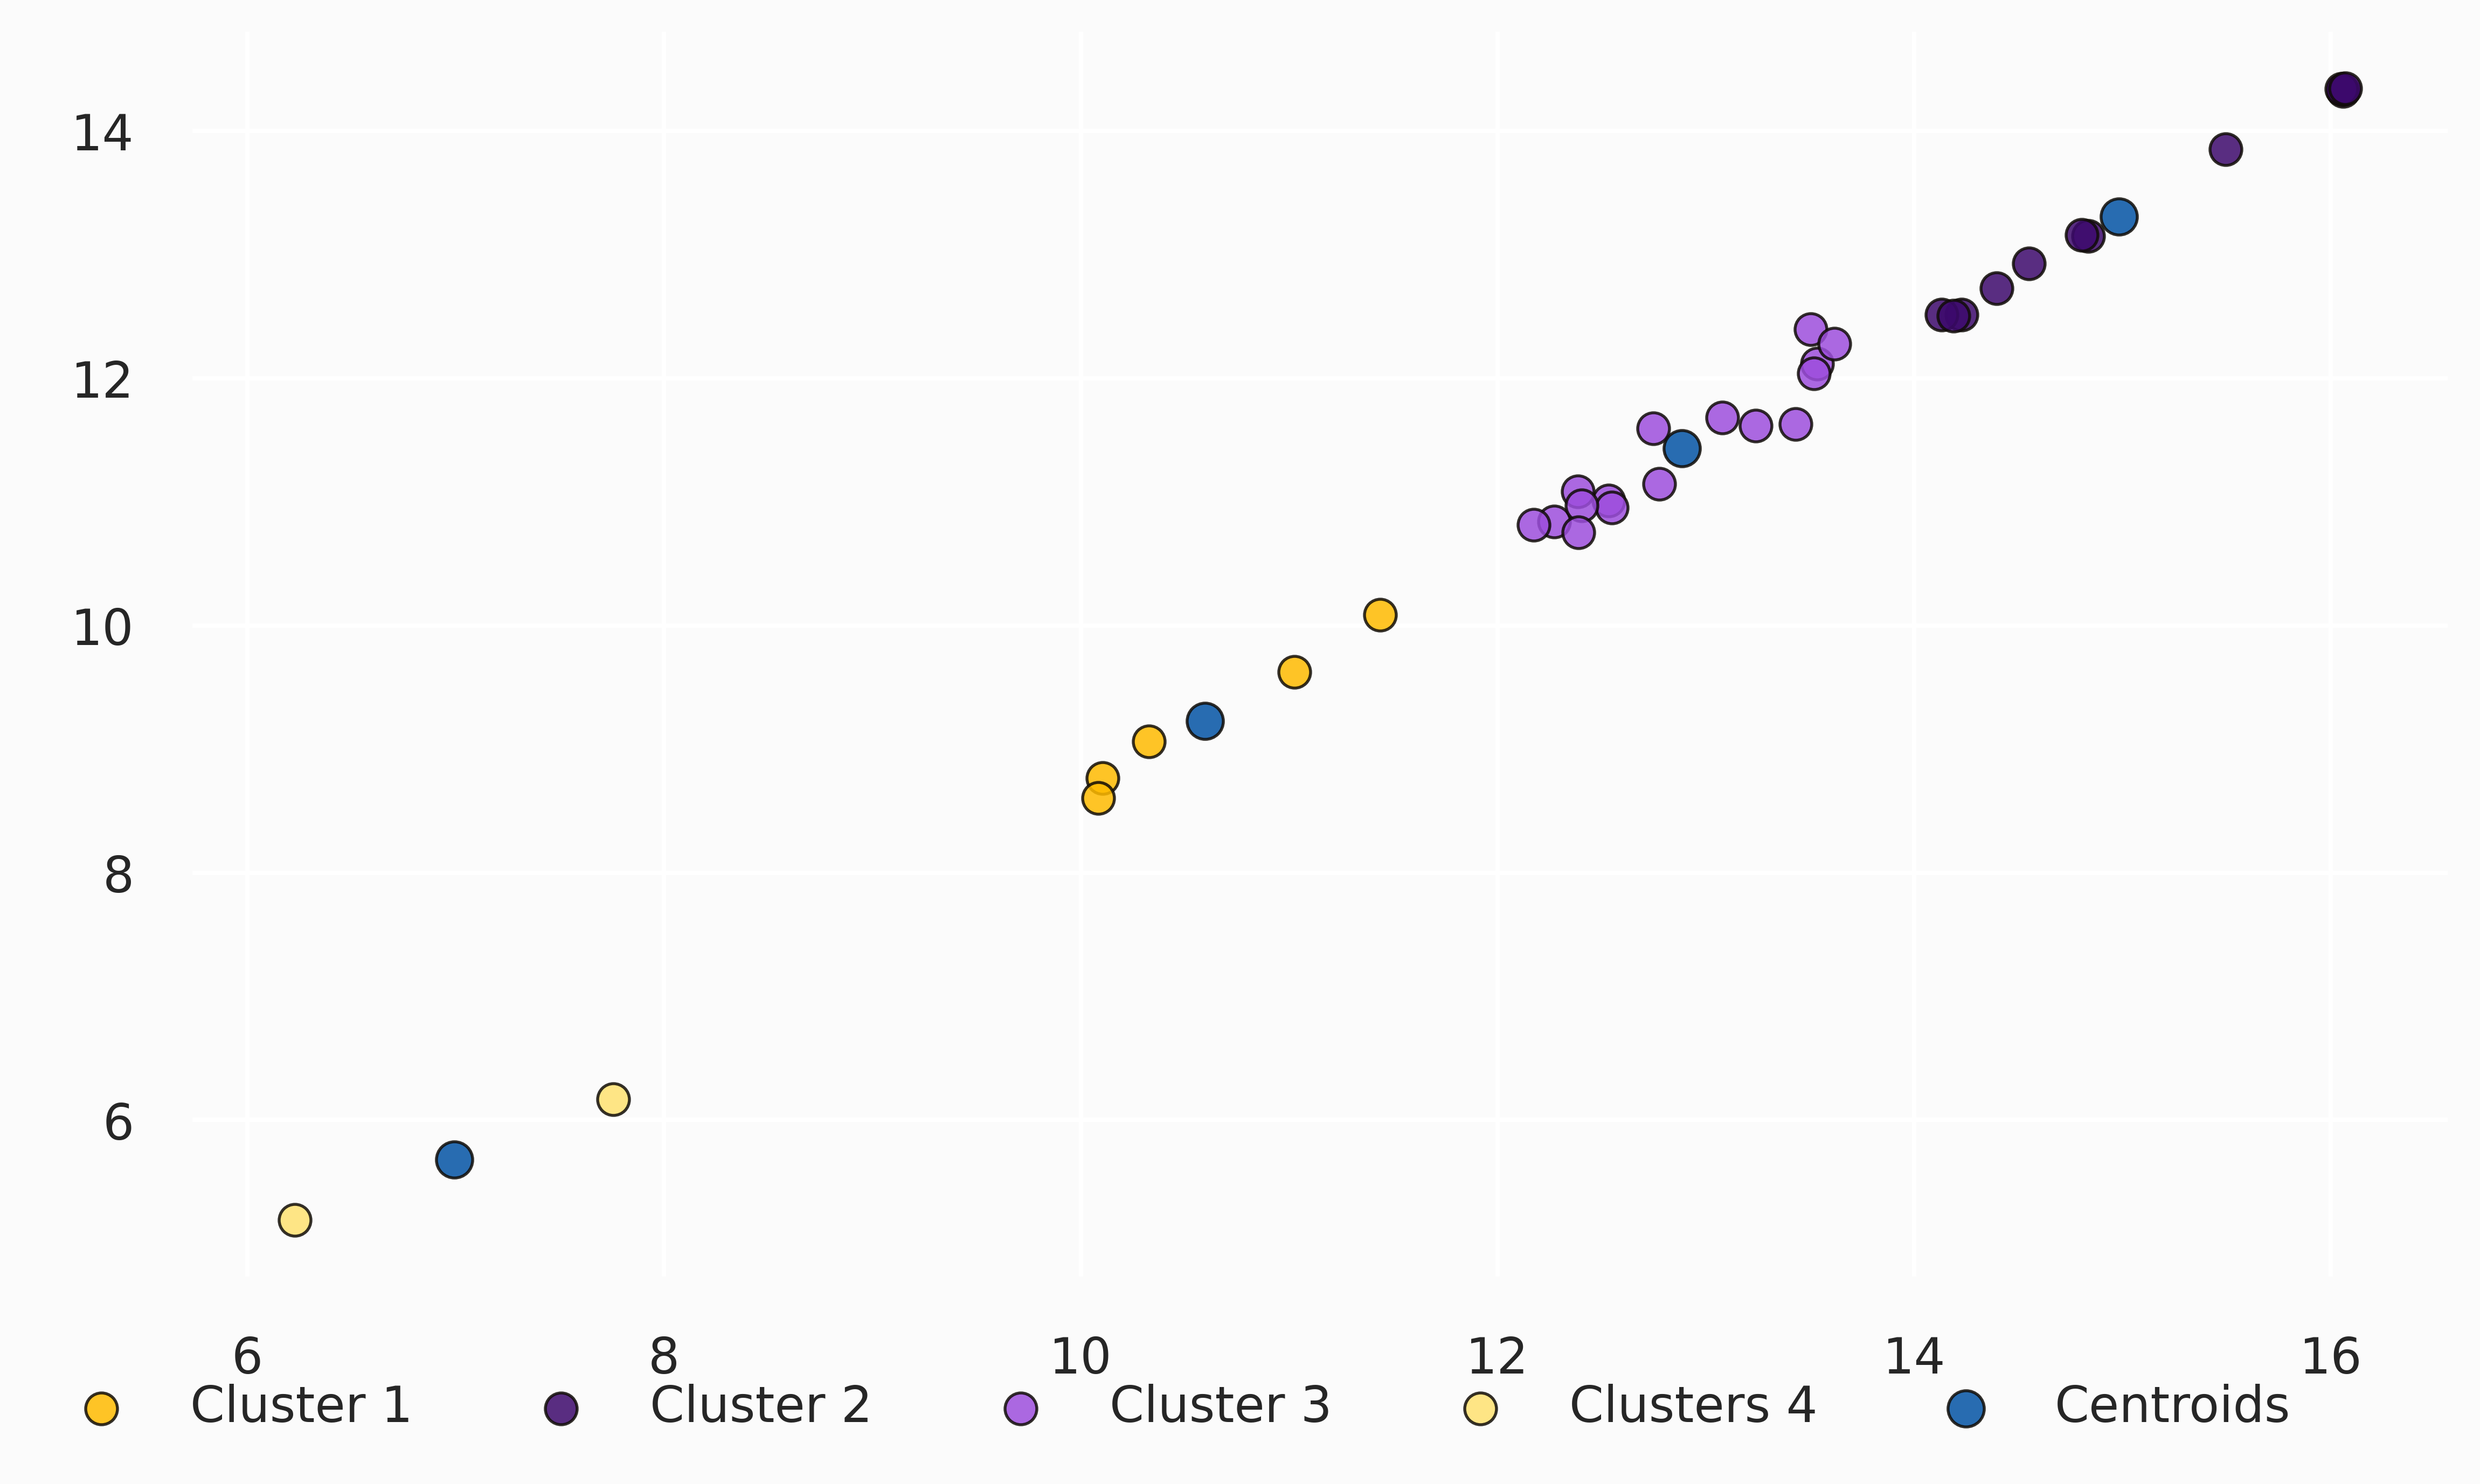

In [ ]:
cluster_colors=['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270' ]
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3' ,'Clusters 4','Centroids']
scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')

fig, ax = plt.subplots(figsize=(9,5))
y_kmeans_labels = list(set(y_kmeans.tolist()))
for i in y_kmeans_labels:
  ax.scatter(X[y_kmeans==i, 0], X[y_kmeans == i, 1], s=50, c=cluster_colors[i], **scatter_style)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=65, c='#0353A4', label='Centroids', **scatter_style)
for spine in ax.spines.values():
  spine.set_color('None')
ax.legend(labels, bbox_to_anchor=(0.95, -0.05), ncol=5)

In [ ]:
df_pca_kmeans = pd.concat([data.reset_index(drop = True), pd.DataFrame(X)], axis = 1)
df_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2','Component 3']
df_pca_kmeans['Segmentasi'] = kmeans.labels_
df_pca_kmeans

Provinsi    Produksi  Luas Panen  Produktivitas  Component 1  \
0                   Aceh  1509456.00   271750.20          55.55    14.227260   
1         Sumatera Utara  2088584.00   411462.10          50.76    14.551997   
2         Sumatera Barat  1373532.00   271883.10          50.52    14.132896   
3                   Riau   213557.20    51054.04          41.83    12.271660   
4                  Jambi   277743.80    60539.59          45.88    12.534454   
5       Sumatera Selatan  2775069.00   513378.20          54.06    14.836186   
6               Bengkulu   281610.10    57151.84          49.27    12.548279   
7                Lampung  2688160.00   518256.10          51.87    14.804368   
8   Kep, Bangka Belitung    61425.07    15107.80          40.66    11.025573   
9              Kep, Riau      506.91      179.48          28.24     6.228333   
10           Dki Jakarta     2337.77      477.25          49.98     7.756953   
11            Jawa Barat  9433723.00  1662404.00          56.75    16.059801   
12           Jawa Tengah  9356445.00  1688670.00          55.41    16.051576   
13         Di Yogyakarta   561699.50   110927.20          50.64    13.238722   
14            Jawa Timur  9526516.00  1693211.00          56.26    16.069590   
15                Banten  1788583.00   337240.70          53.04    14.396934   
16                  Bali   680601.60   112320.60          60.59    13.430732   
17   Nusa Tenggara Barat  1452945.00   270092.90          53.79    14.189103   
18   Nusa Tenggara Timur   756049.90   183092.00          41.29    13.535863   
19      Kalimantan Barat   731225.80   241478.60          30.28    13.502478   
20     Kalimantan Tengah   343918.80   108226.80          31.78    12.748161   
21    Kalimantan Selatan   819419.20   214908.90          38.13    13.616351   
22      Kalimantan Timur   239425.30    64970.01          36.85    12.385997   
23      Kalimantan Utara    30533.59     8604.19          35.49    10.326583   
24        Sulawesi Utara   243730.30    58195.56          41.88    12.403818   
25       Sulawesi Tengah   744408.70   168993.20          44.05    13.520345   
26      Sulawesi Selatan  5360169.00  1038084.00          51.64    15.494506   
27     Sulawesi Tenggara   478958.00   118258.80          40.50    13.079368   
28             Gorontalo   240134.50    46823.47          51.29    12.388954   
29        Sulawesi Barat   353513.30    69323.95          50.99    12.775676   
30                Maluku    92601.06    23987.82          38.16    11.436056   
31          Maluku Utara    24486.03     6416.45          43.89    10.105858   
32           Papua Barat    23963.92     5460.59          38.99    10.084305   
33                 Papua   193943.50    49741.91          52.38    12.175322   

    Component 2  Component 3  Segmentasi  
0     12.512639     4.017284           1  
1     12.927472     3.927109           1  
2     12.513127     3.922369           1  
3     10.840640     3.733614           2  
4     11.011053     3.826029           2  
5     13.148768     3.990095           1  
6     10.953467     3.897315           2  
7     13.158225     3.948741           1  
8      9.622966     3.705245           0  
9      5.190064     3.340739           3  
10     6.168040     3.911623           3  
11    14.323775     4.038656           1  
12    14.339452     4.014760           1  
13    11.616629     3.924742           2  
14    14.342137     4.029984           1  
15    12.728552     3.971046           1  
16    11.629113     4.104130           2  
17    12.506521     3.985088           1  
18    12.117744     3.720620           2  
19    12.394536     3.410487           2  
20    11.591984     3.458837           2  
21    12.277969     3.641001           2  
22    11.081681     3.606856           2  
23     9.060005     3.569251           0  
24    10.971564     3.734808           2  
25    12.037614     3.785325           2  
26    13.852887     3.944297           1  
27    11.68

In [ ]:
df_pca_kmeans['Segmentasi'] = df_pca_kmeans['Segmentasi PCA'].map({0:'1',
                                                                   1:'2',
                                                                   2:'3'})

# DBSCAN

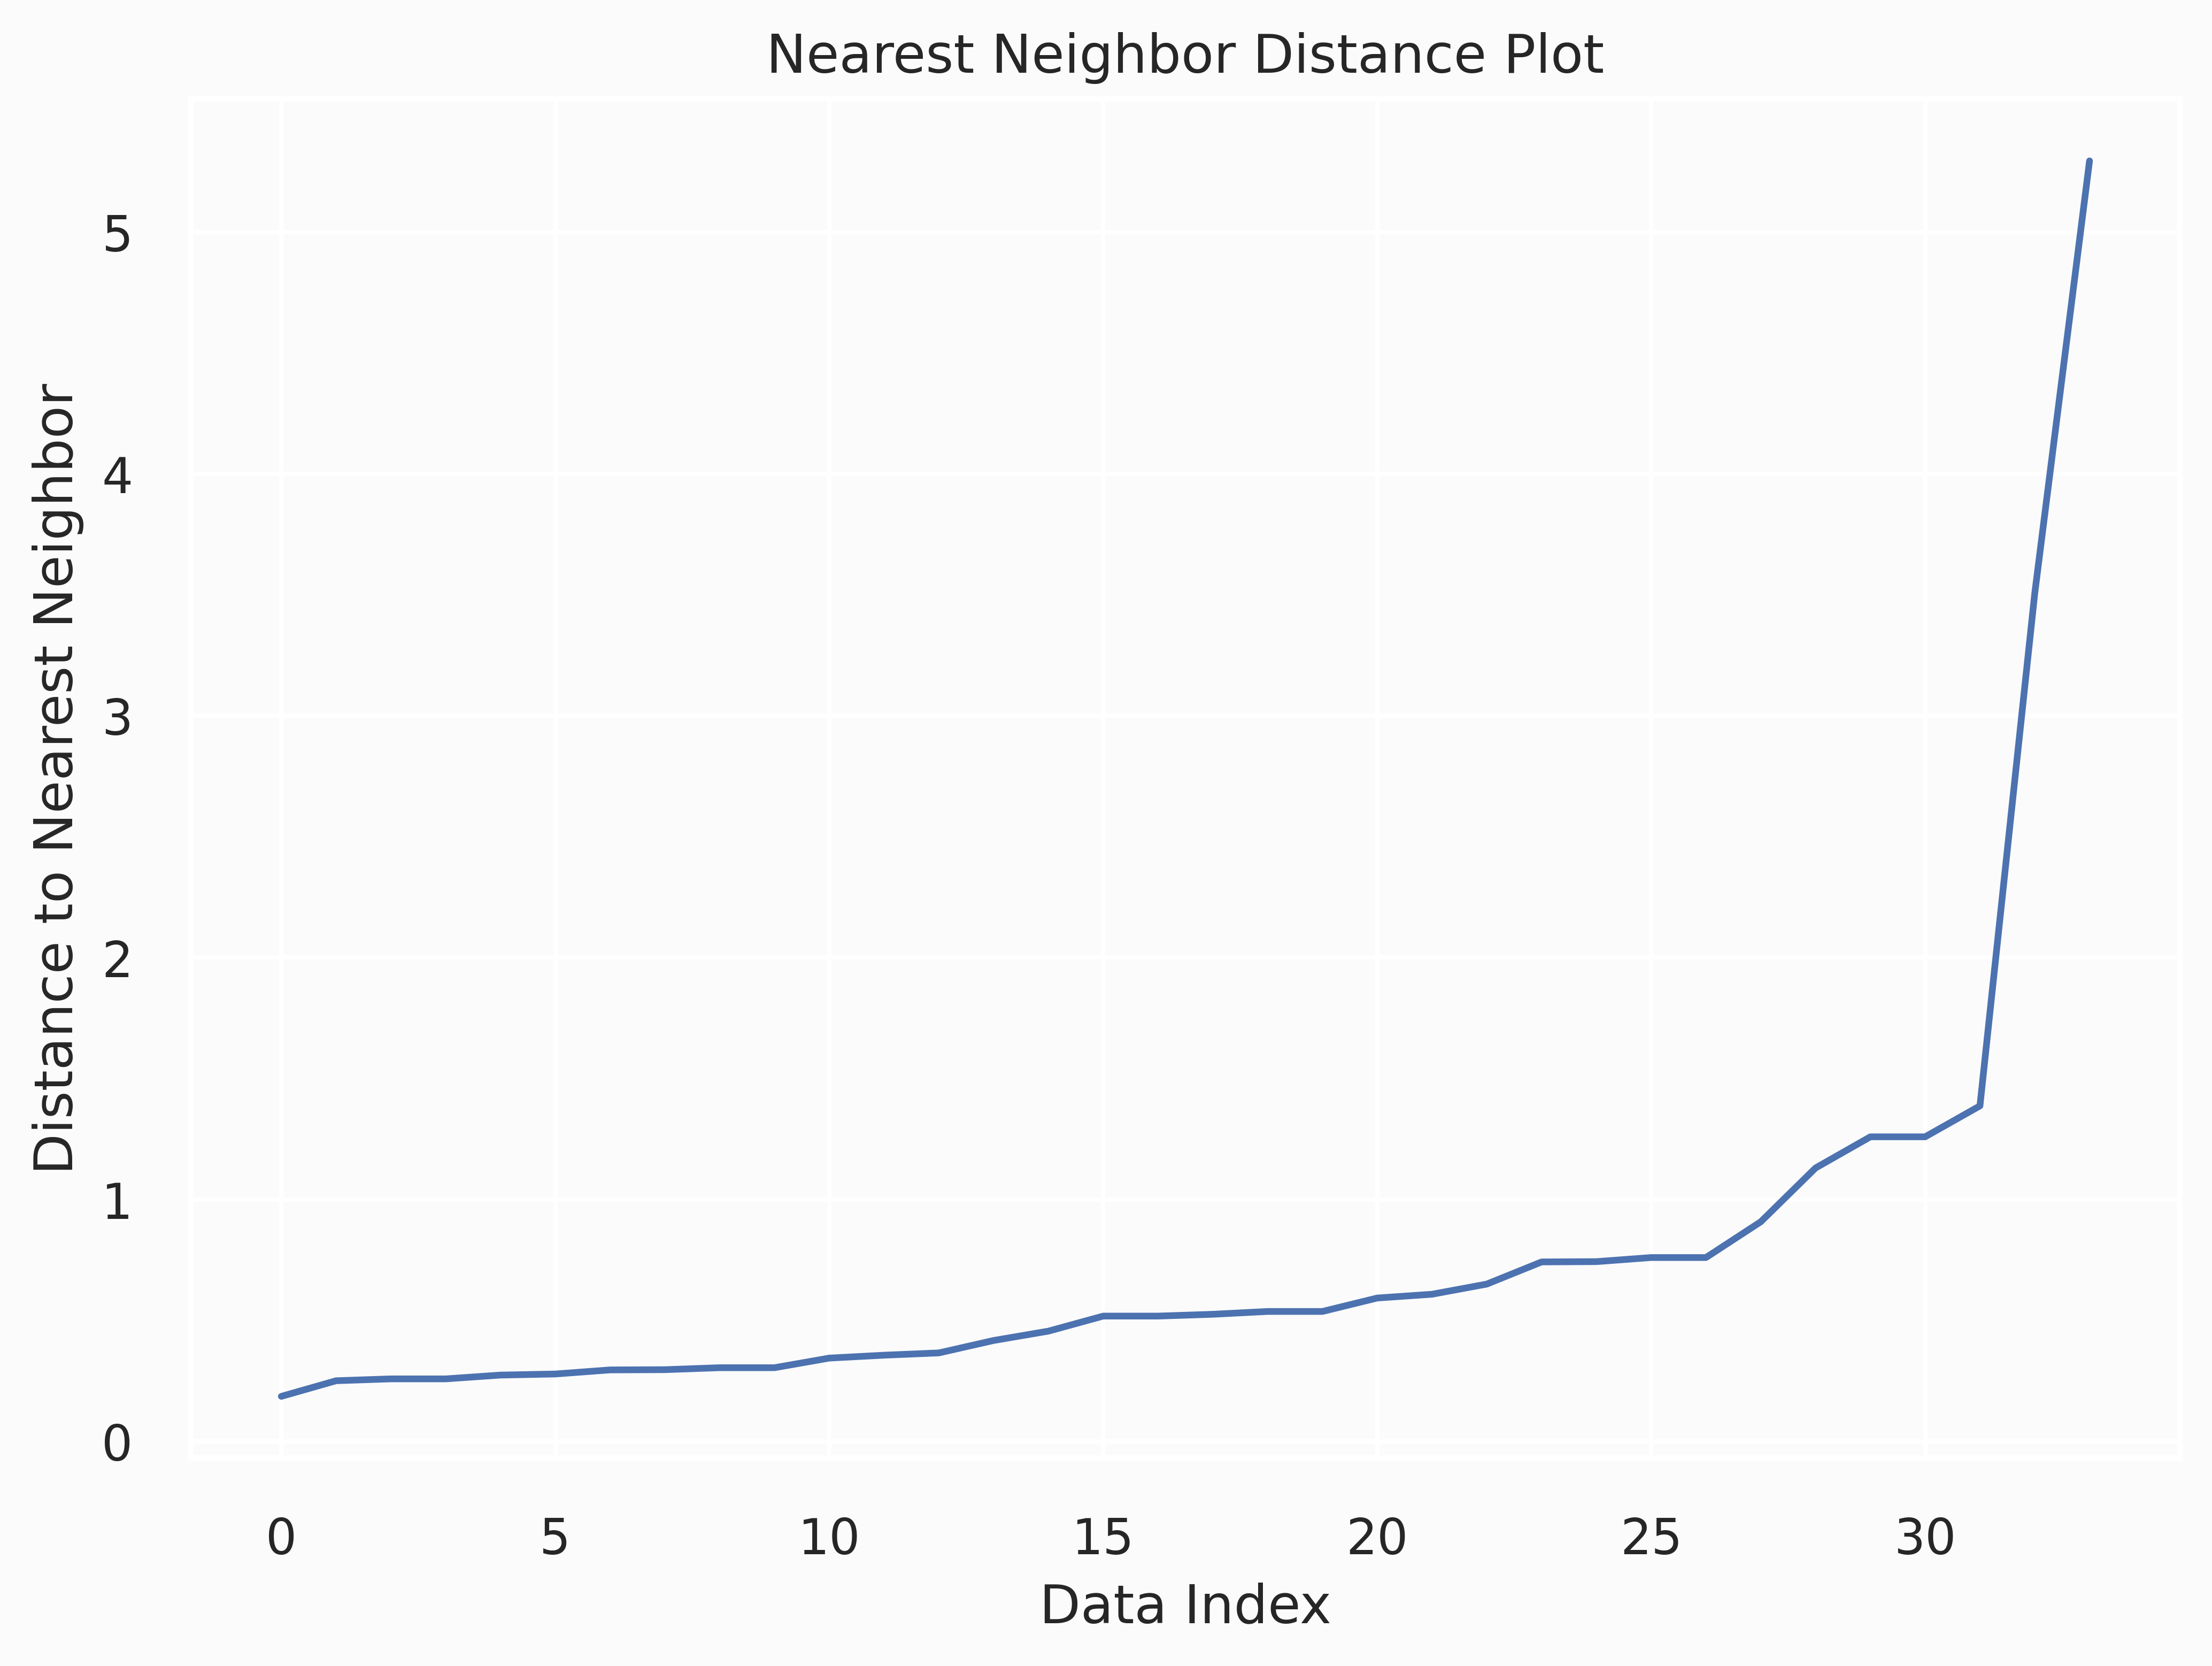

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Menghitung jarak ke tetangga terdekat
def compute_nearest_neighbors(data, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, indices = neigh.kneighbors(data)
    return distances[:, -1]  # Mengambil jarak ke tetangga terdekat

# Mengurutkan jarak secara menaik
def sort_distances(distances):
    return np.sort(distances)

# Plot jarak ke tetangga terdekat
def plot_distances(distances):
    plt.plot(distances)
    plt.xlabel('Data Index')
    plt.ylabel('Distance to Nearest Neighbor')
    plt.title('Nearest Neighbor Distance Plot')
    plt.show()

# Contoh penggunaan
k = 4  # Jumlah tetangga terdekat yang ingin dihitung

distances = compute_nearest_neighbors(X, k)
sorted_distances = sort_distances(distances)
plot_distances(sorted_distances)


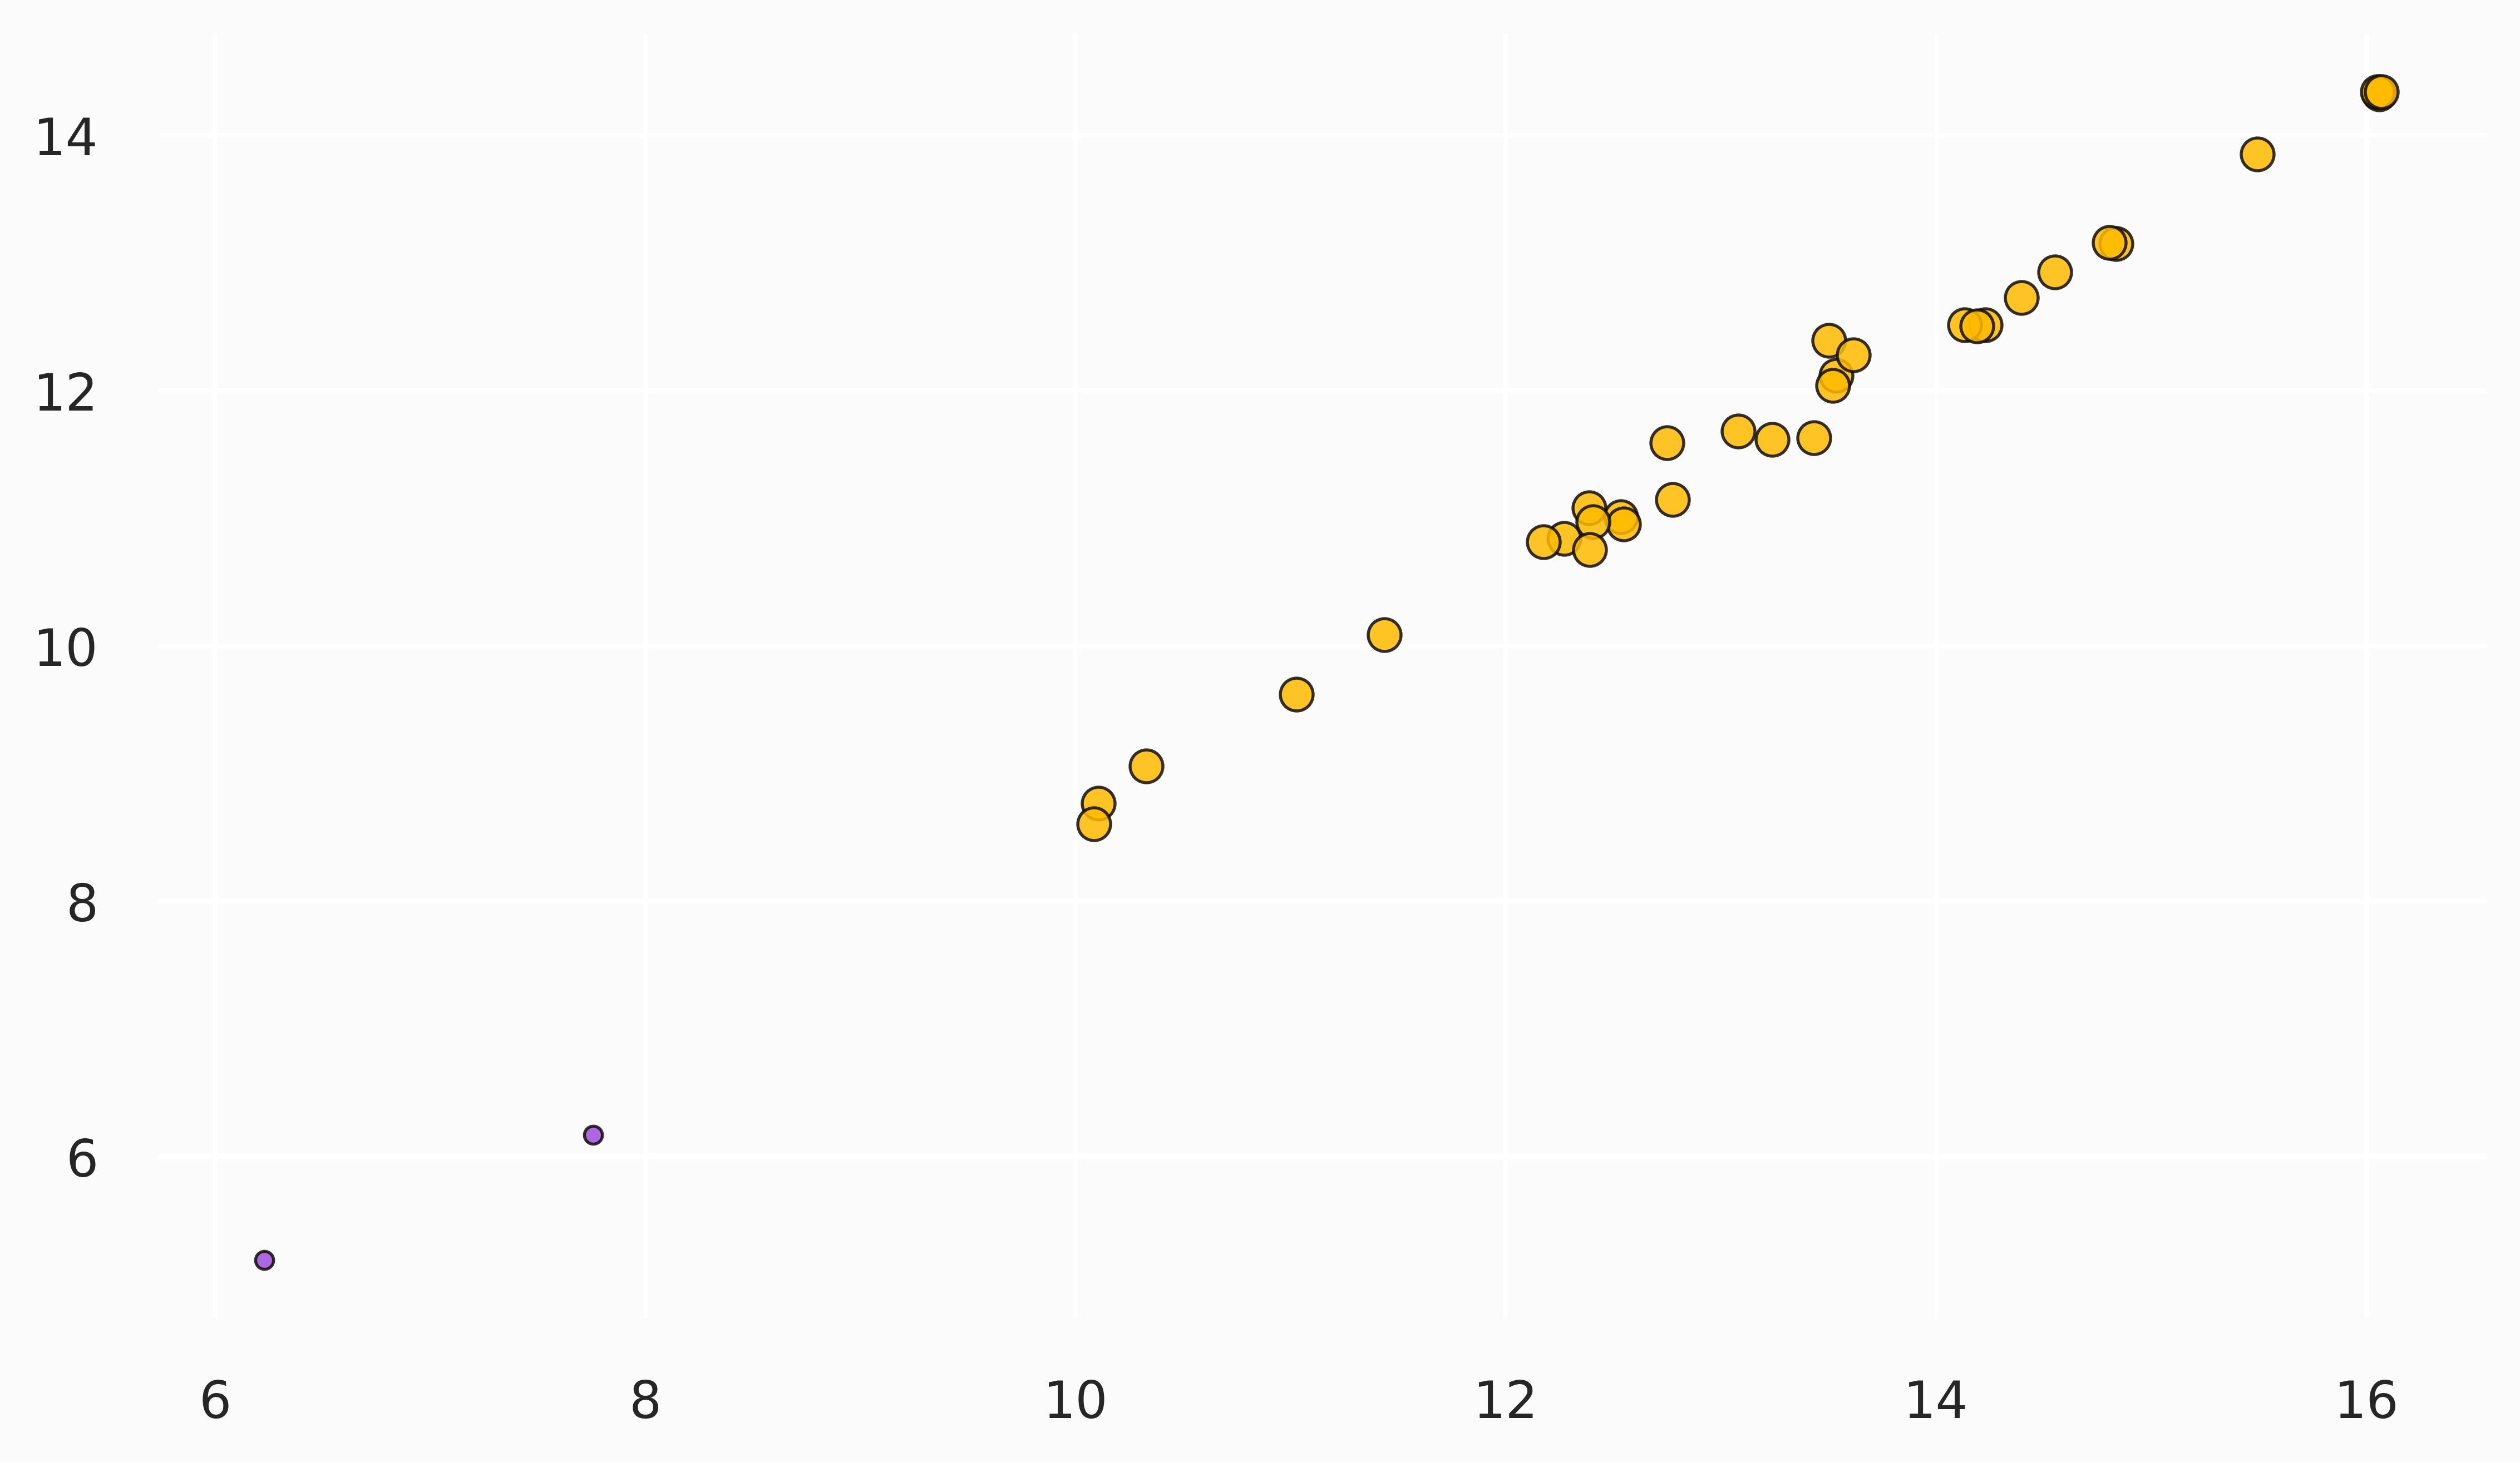

In [ ]:
dbscan = DBSCAN(eps=1.25, min_samples=2)
y_dbscan = dbscan.fit_predict(X)

cluster_colors=['#FFBB00', '#3C096C', '#9D4EDD']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'outliers']
scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')

fig, ax = plt.subplots(figsize=(9,5))
y_dbscan_labels = list(set(y_dbscan.tolist()))
for i in np.arange(0, 2, 1):
  ax.scatter(X[y_dbscan==i, 0], X[y_dbscan == i, 1], s=50, c=cluster_colors[i], label=labels[i], **scatter_style)
ax.scatter(X[y_dbscan==-1, 0], X[y_dbscan == -1, 1], s=15, c=cluster_colors[2], label=labels[2], **scatter_style)
for spine in ax.spines.values():
  spine.set_color('None')

In [ ]:
df_dbscan = pd.concat([data.reset_index(drop = True), pd.DataFrame(X)], axis = 1)
df_dbscan.columns.values[-3: ] = ['Component 1', 'Component 2','Component 3']
df_dbscan['Segmentasi'] = dbscan.labels_
df_dbscan

Provinsi    Produksi  Luas Panen  Produktivitas  Component 1  \
0                   Aceh  1509456.00   271750.20          55.55    14.227260   
1         Sumatera Utara  2088584.00   411462.10          50.76    14.551997   
2         Sumatera Barat  1373532.00   271883.10          50.52    14.132896   
3                   Riau   213557.20    51054.04          41.83    12.271660   
4                  Jambi   277743.80    60539.59          45.88    12.534454   
5       Sumatera Selatan  2775069.00   513378.20          54.06    14.836186   
6               Bengkulu   281610.10    57151.84          49.27    12.548279   
7                Lampung  2688160.00   518256.10          51.87    14.804368   
8   Kep, Bangka Belitung    61425.07    15107.80          40.66    11.025573   
9              Kep, Riau      506.91      179.48          28.24     6.228333   
10           Dki Jakarta     2337.77      477.25          49.98     7.756953   
11            Jawa Barat  9433723.00  1662404.00          56.75    16.059801   
12           Jawa Tengah  9356445.00  1688670.00          55.41    16.051576   
13         Di Yogyakarta   561699.50   110927.20          50.64    13.238722   
14            Jawa Timur  9526516.00  1693211.00          56.26    16.069590   
15                Banten  1788583.00   337240.70          53.04    14.396934   
16                  Bali   680601.60   112320.60          60.59    13.430732   
17   Nusa Tenggara Barat  1452945.00   270092.90          53.79    14.189103   
18   Nusa Tenggara Timur   756049.90   183092.00          41.29    13.535863   
19      Kalimantan Barat   731225.80   241478.60          30.28    13.502478   
20     Kalimantan Tengah   343918.80   108226.80          31.78    12.748161   
21    Kalimantan Selatan   819419.20   214908.90          38.13    13.616351   
22      Kalimantan Timur   239425.30    64970.01          36.85    12.385997   
23      Kalimantan Utara    30533.59     8604.19          35.49    10.326583   
24        Sulawesi Utara   243730.30    58195.56          41.88    12.403818   
25       Sulawesi Tengah   744408.70   168993.20          44.05    13.520345   
26      Sulawesi Selatan  5360169.00  1038084.00          51.64    15.494506   
27     Sulawesi Tenggara   478958.00   118258.80          40.50    13.079368   
28             Gorontalo   240134.50    46823.47          51.29    12.388954   
29        Sulawesi Barat   353513.30    69323.95          50.99    12.775676   
30                Maluku    92601.06    23987.82          38.16    11.436056   
31          Maluku Utara    24486.03     6416.45          43.89    10.105858   
32           Papua Barat    23963.92     5460.59          38.99    10.084305   
33                 Papua   193943.50    49741.91          52.38    12.175322   

    Component 2  Component 3  Segmentasi  
0     12.512639     4.017284           0  
1     12.927472     3.927109           0  
2     12.513127     3.922369           0  
3     10.840640     3.733614           0  
4     11.011053     3.826029           0  
5     13.148768     3.990095           0  
6     10.953467     3.897315           0  
7     13.158225     3.948741           0  
8      9.622966     3.705245           0  
9      5.190064     3.340739          -1  
10     6.168040     3.911623          -1  
11    14.323775     4.038656           0  
12    14.339452     4.014760           0  
13    11.616629     3.924742           0  
14    14.342137     4.029984           0  
15    12.728552     3.971046           0  
16    11.629113     4.104130           0  
17    12.506521     3.985088           0  
18    12.117744     3.720620           0  
19    12.394536     3.410487           0  
20    11.591984     3.458837           0  
21    12.277969     3.641001           0  
22    11.081681     3.606856           0  
23     9.060005     3.569251           0  
24    10.971564     3.734808           0  
25    12.037614     3.785325           0  
26    13.852887     3.944297           0  
27    11.68

# Aglometerive

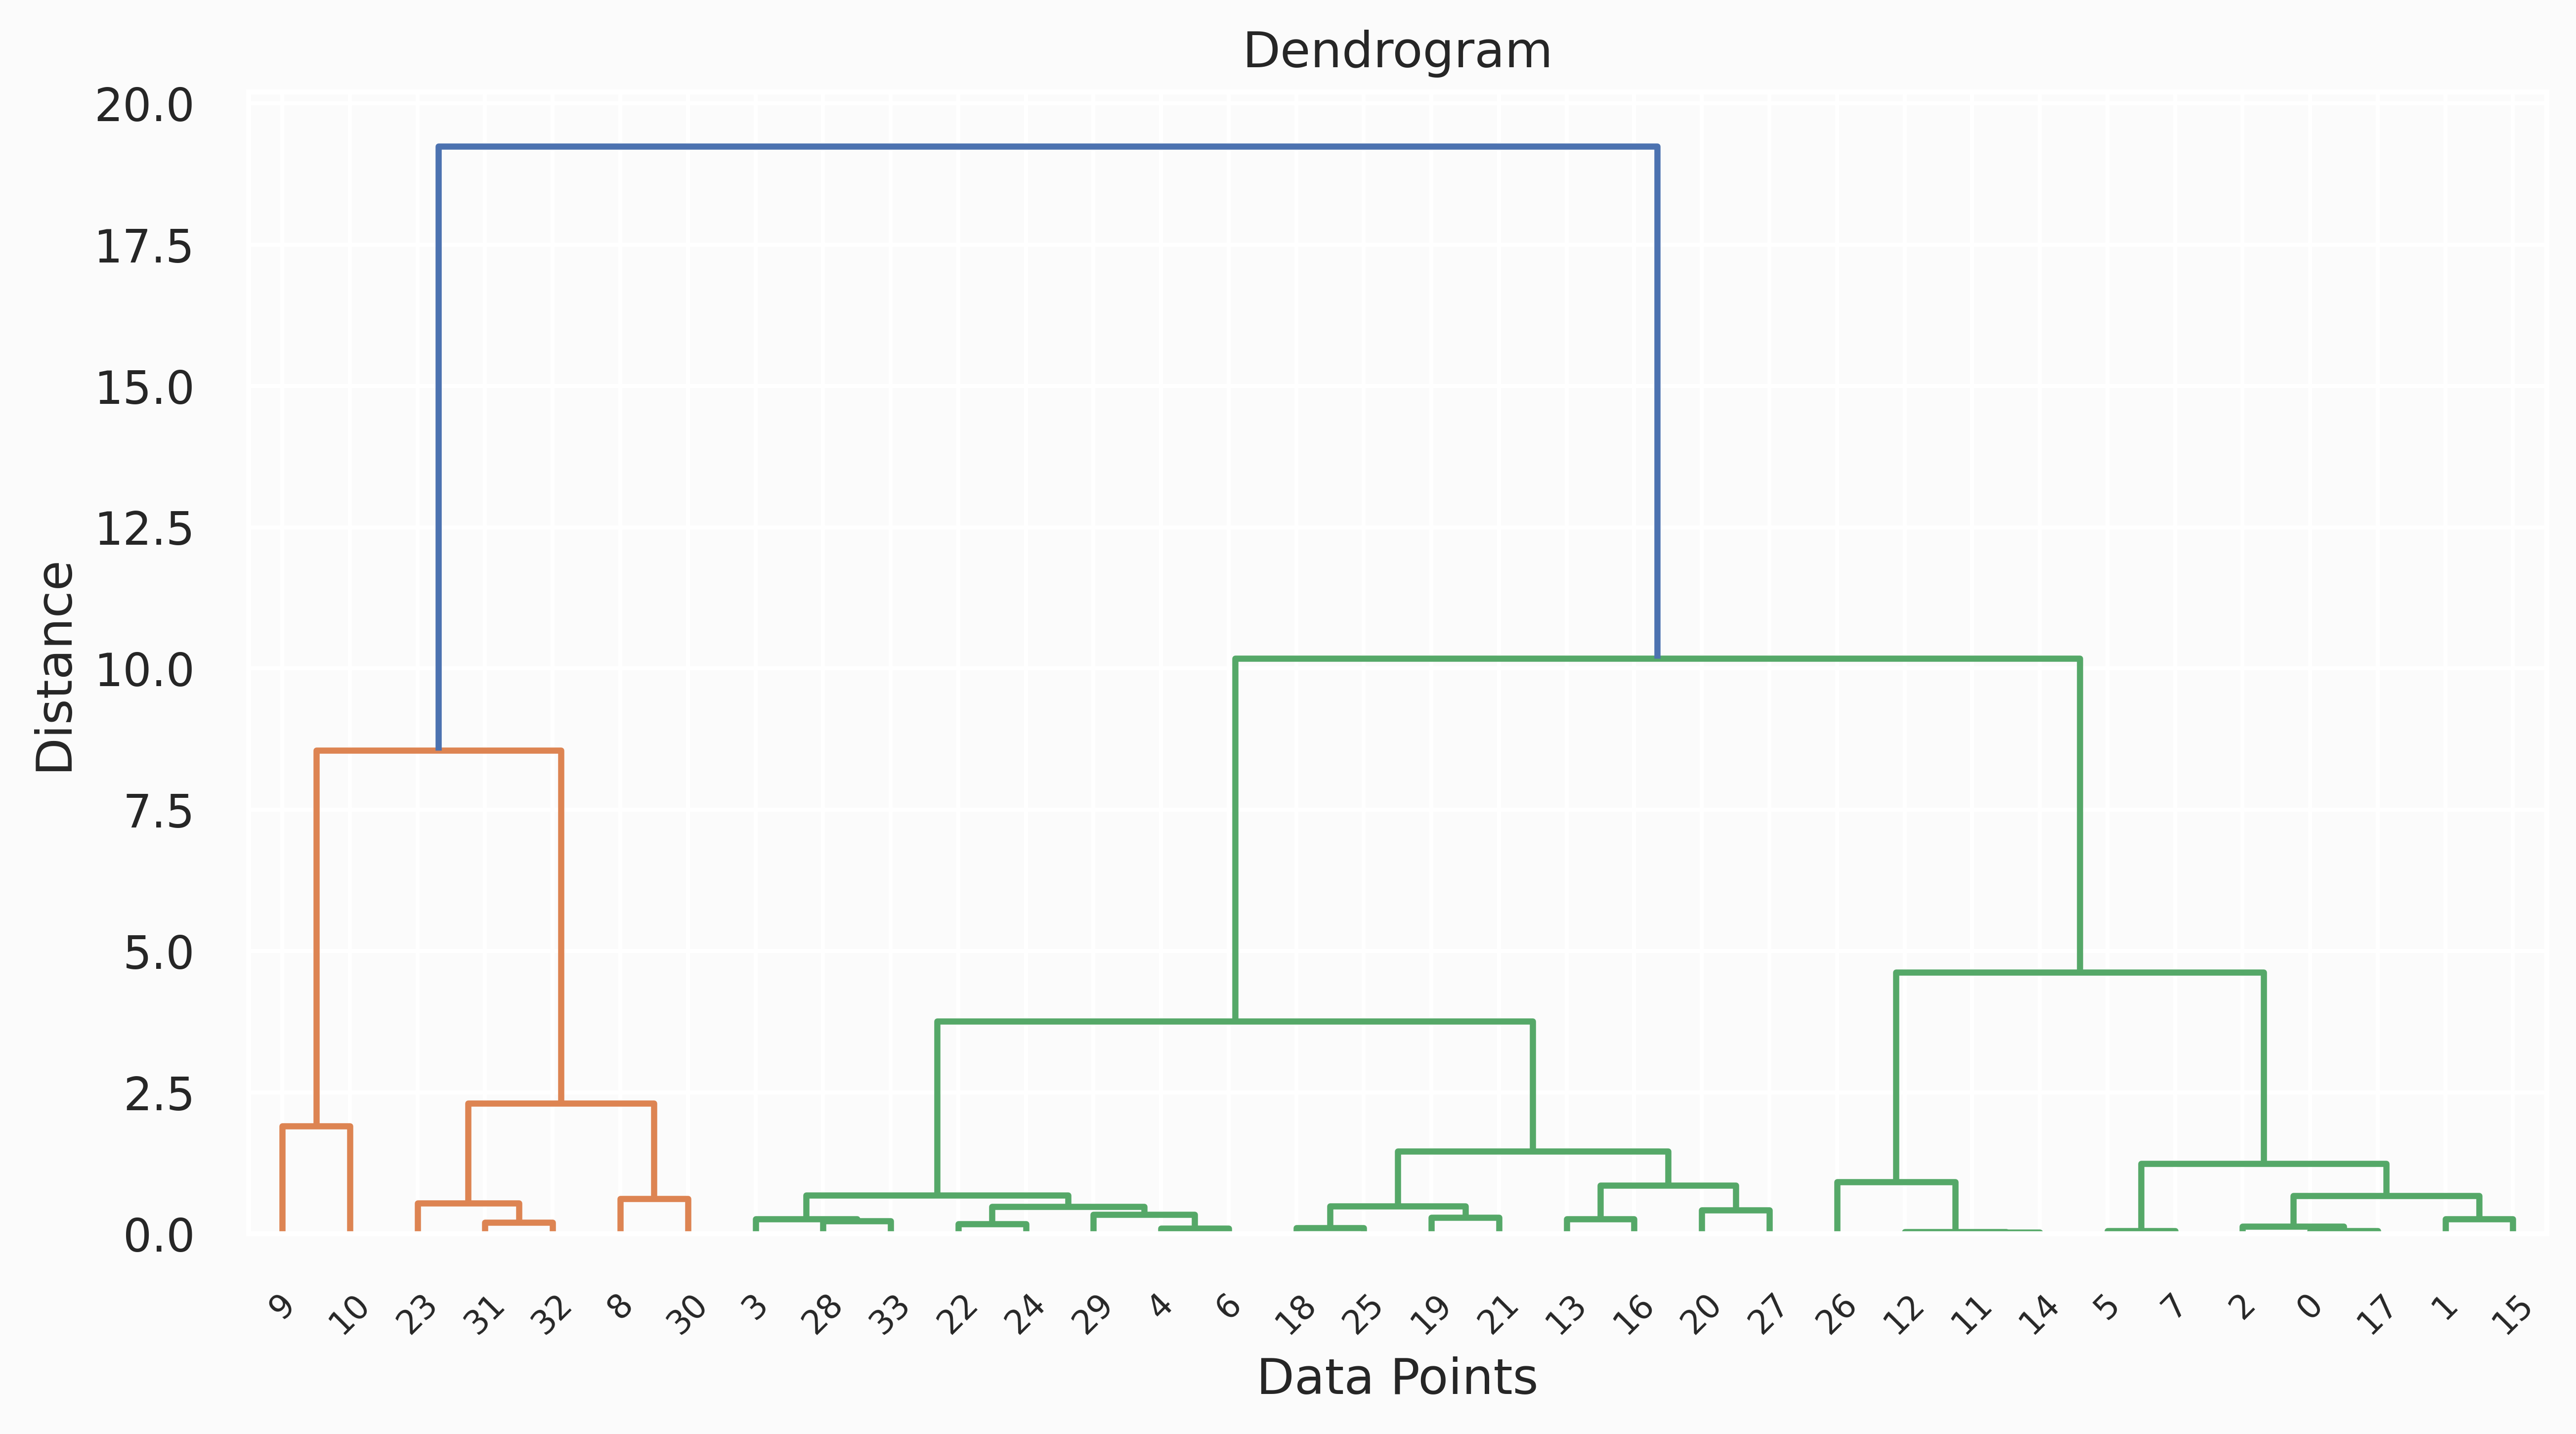

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Membuat linkage matrix dengan metode aglomerative clustering
Z = linkage(X, 'ward')
# Membuat dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()


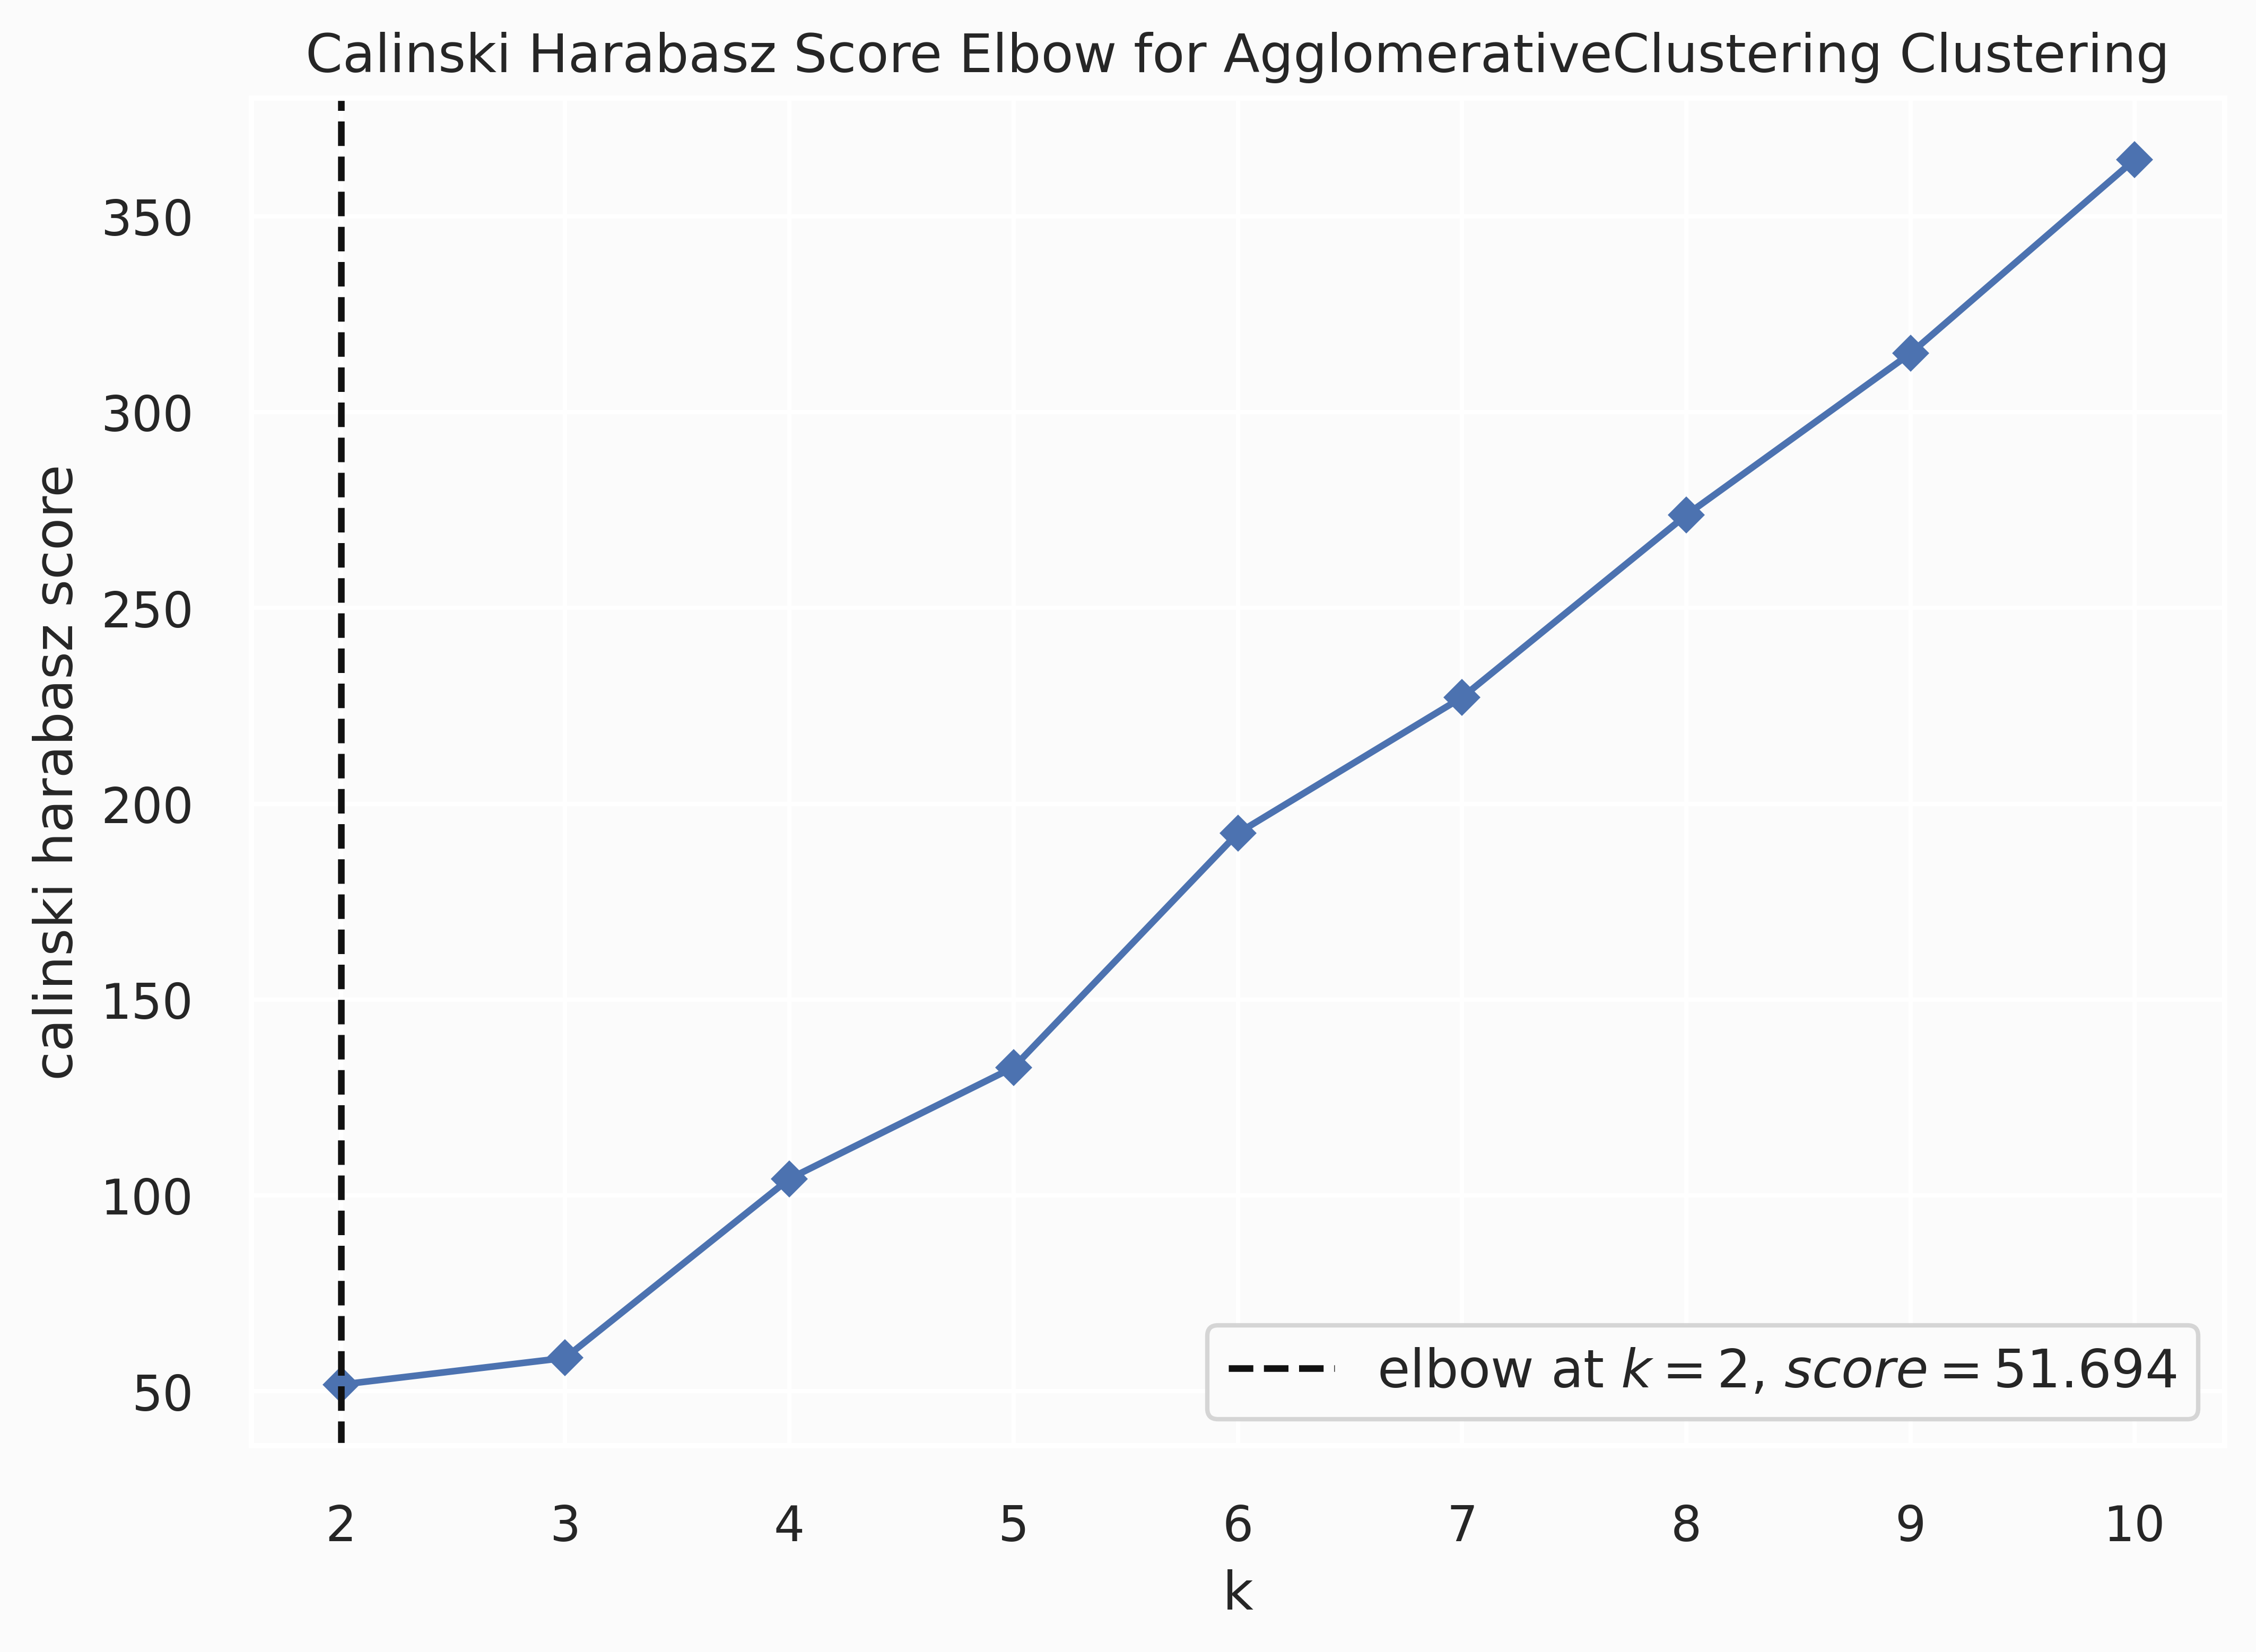

<Axes: title={'center': 'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
elbow_score_ch = KElbowVisualizer(AgglomerativeClustering(), metric='calinski_harabasz', timings=False)
elbow_score_ch.fit(X)
elbow_score_ch.show()

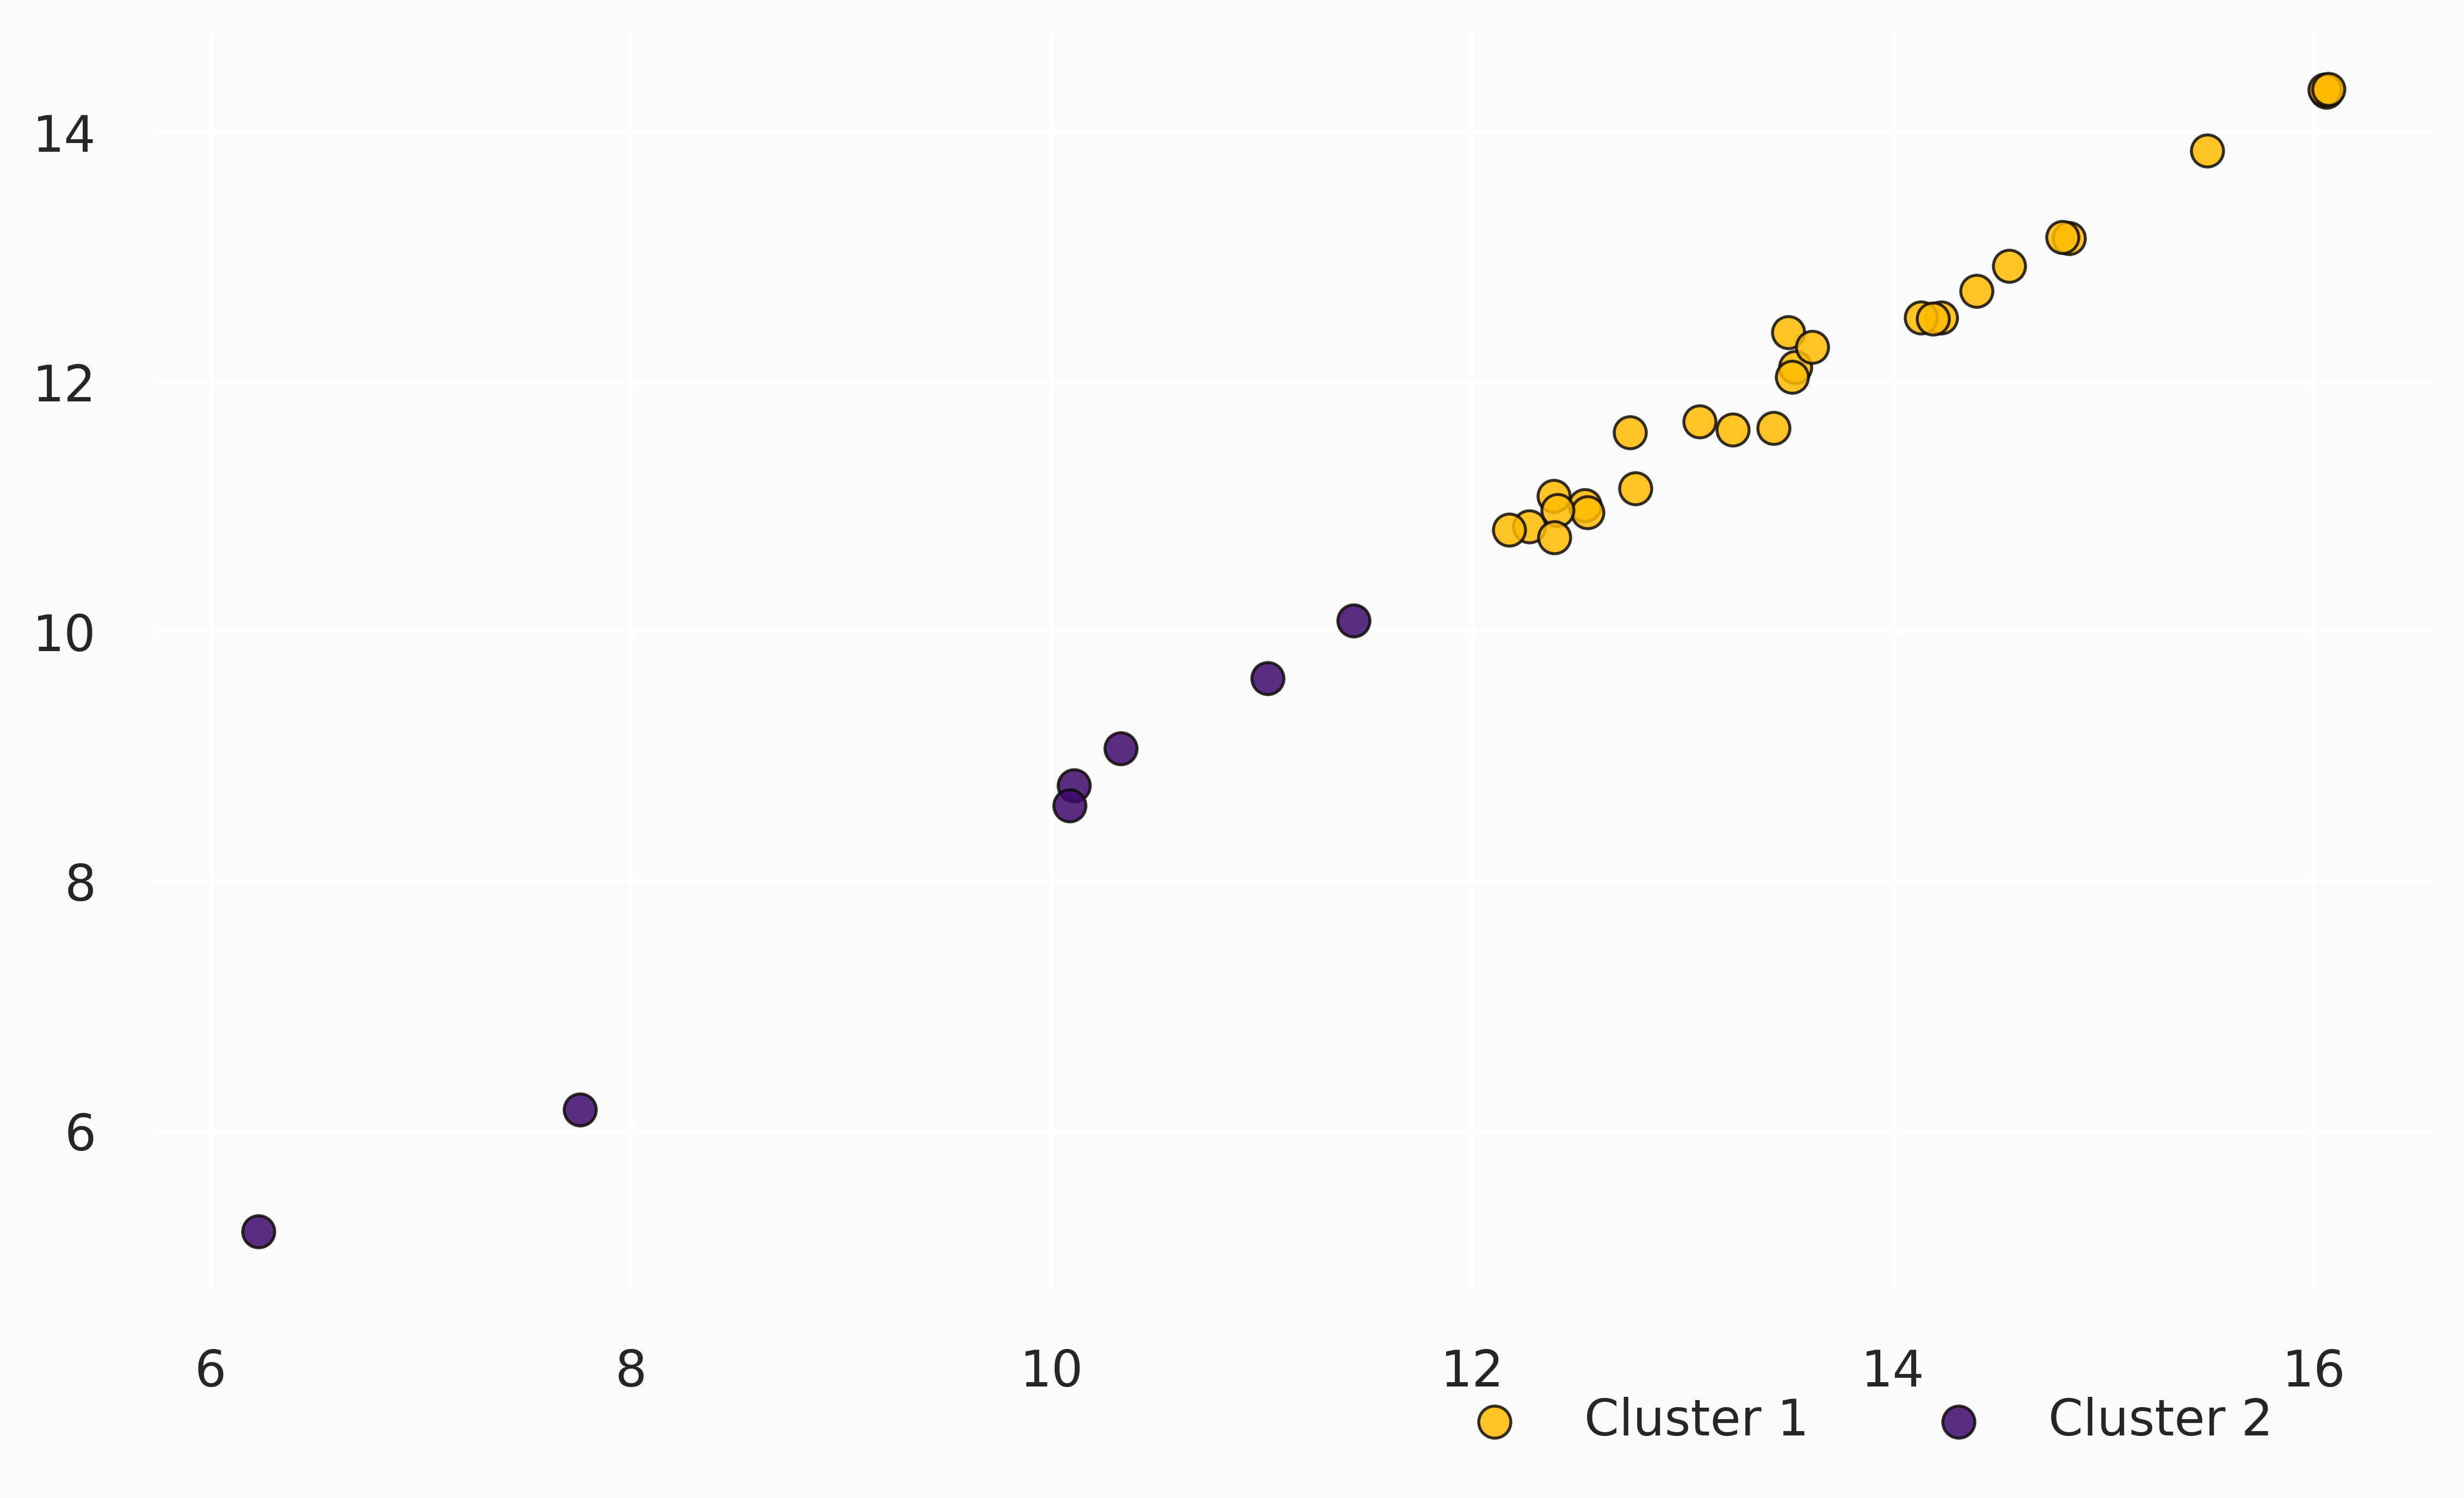

In [ ]:
agg_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_agg_cluster = agg_cluster.fit_predict(X)


cluster_colors=['#FFBB00', '#3C096C', '#9D4EDD']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']
scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')

fig, ax = plt.subplots(figsize=(9,5))
y_agg_labels = list(set(y_agg_cluster.tolist()))
for i in y_agg_labels:
  ax.scatter(X[y_agg_cluster==i, 0], X[y_agg_cluster == i, 1], s=50, c=cluster_colors[i], label=labels[i], **scatter_style)
for spine in ax.spines.values():
  spine.set_color('None')
ax.legend(labels, bbox_to_anchor=(0.95, -0.05), ncol=5)

In [ ]:
df_agg = pd.concat([data.reset_index(drop = True), pd.DataFrame(X)], axis = 1)
df_agg.columns.values[-3: ] = ['Component 1', 'Component 2','Component 3']
df_agg['Segmentasi PCA'] = agg_cluster.labels_
df_agg.head()

Provinsi   Produksi  Luas Panen  Produktivitas  Component 1  \
0            Aceh  1509456.0   271750.20          55.55    14.227260   
1  Sumatera Utara  2088584.0   411462.10          50.76    14.551997   
2  Sumatera Barat  1373532.0   271883.10          50.52    14.132896   
3            Riau   213557.2    51054.04          41.83    12.271660   
4           Jambi   277743.8    60539.59          45.88    12.534454   

   Component 2  Component 3  Segmentasi PCA  
0    12.512639     4.017284               0  
1    12.927472     3.927109               0  
2    12.513127     3.922369               0  
3    10.840640     3.733614               0  
4    11.011053     3.826029               0

# Model Evaluation

In [ ]:
# --- Evaluate Clustering Quality Function ---
def evaluate_clustering(X, y):
  db_index = round(davies_bouldin_score(X, y), 3)
  s_score = round(silhouette_score(X, y), 3)
  ch_index = round(calinski_harabasz_score(X, y), 3)
  return db_index, s_score, ch_index

db_kmeans, ss_kmeans, ch_kmeans = evaluate_clustering(X, y_kmeans)
db_agg, ss_agg, ch_agg = evaluate_clustering(X, y_agg_cluster)
db_dbscan, ss_dbscan, ch_dbscan = evaluate_clustering(X, y_dbscan)

compare = pd.DataFrame({'Model': ['K-Means', 'DBSCAN', 'Hierarchical Clustering'],
                        'Davies-Bouldin Index': [db_kmeans, db_dbscan, db_agg],
                        'Silhouette Score': [ss_kmeans, ss_dbscan, ss_agg],
                       'Calinski-Harabasz Index': [ch_kmeans, ch_dbscan, ch_agg]})

compare

Model  Davies-Bouldin Index  Silhouette Score  \
0                  K-Means                 0.490             0.562   
1                   DBSCAN                 0.314             0.672   
2  Hierarchical Clustering                 0.602             0.603   

   Calinski-Harabasz Index  
0                  104.252  
1                   29.074  
2                   51.694

# Cluster Profiling

In [ ]:
# --- Add K-Means Prediction to Data Frame ----
df_cluster['cluster_result'] = y_kmeans+1
df_cluster['cluster_result'] = 'Cluster '+df_cluster['cluster_result'].astype(str)

# --- Calculationg Overall Mean from Current Data Frame ---
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = df_cluster.describe().loc[['mean']].T

# --- Summarize Mean of Each Clusters ---
df_cluster_summary = df_cluster.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

# --- Combining Both Data Frame ---
df_profile = df_cluster_summary.join(df_profile_overall).reset_index()
df_profile.style.background_gradient(cmap='YlOrBr').hide_index()

In [ ]:
data ['Cluster'] = y_kmeans

In [ ]:
data

Provinsi    Produksi  Luas Panen  Produktivitas  Cluster
136                  Aceh  1509456.00   271750.20          55.55        1
137        Sumatera Utara  2088584.00   411462.10          50.76        1
138        Sumatera Barat  1373532.00   271883.10          50.52        1
139                  Riau   213557.20    51054.04          41.83        2
140                 Jambi   277743.80    60539.59          45.88        2
141      Sumatera Selatan  2775069.00   513378.20          54.06        1
142              Bengkulu   281610.10    57151.84          49.27        2
143               Lampung  2688160.00   518256.10          51.87        1
144  Kep, Bangka Belitung    61425.07    15107.80          40.66        0
145             Kep, Riau      506.91      179.48          28.24        3
146           Dki Jakarta     2337.77      477.25          49.98        3
147            Jawa Barat  9433723.00  1662404.00          56.75        1
148           Jawa Tengah  9356445.00  1688670.00          55.41        1
149         Di Yogyakarta   561699.50   110927.20          50.64        2
150            Jawa Timur  9526516.00  1693211.00          56.26        1
151                Banten  1788583.00   337240.70          53.04        1
152                  Bali   680601.60   112320.60          60.59        2
153   Nusa Tenggara Barat  1452945.00   270092.90          53.79        1
154   Nusa Tenggara Timur   756049.90   183092.00          41.29        2
155      Kalimantan Barat   731225.80   241478.60          30.28        2
156     Kalimantan Tengah   343918.80   108226.80          31.78        2
157    Kalimantan Selatan   819419.20   214908.90          38.13        2
158      Kalimantan Timur   239425.30    64970.01          36.85        2
159      Kalimantan Utara    30533.59     8604.19          35.49        0
160        Sulawesi Utara   243730.30    58195.56          41.88        2
161       Sulawesi Tengah   744408.70   168993.20          44.05        2
162      Sulawesi Selatan  5360169.00  1038084.00          51.64        1
163     Sulawesi Tenggara   478958.00   118258.80          40.50        2
164             Gorontalo   240134.50    46823.47          51.29        2
165        Sulawesi Barat   353513.30    69323.95          50.99        2
166                Maluku    92601.06    23987.82          38.16        0
167          Maluku Utara    24486.03     6416.45          43.89        0
168           Papua Barat    23963.92     5460.59          38.99        0
169                 Papua   193943.50    49741.91          52.38        2

In [ ]:
data.to_excel('data2021.xlsx')